In [7]:
import os
#from google.colab import drive
#drive.mount('/content/drive')

basic_path = "C:/Users/silvests/Embodied_counting/src/"

# Import: imports
directory_path = basic_path

file_name = "imports.py"
PATH = directory_path + file_name
%run -i $PATH

# Import: environment
directory_path = basic_path + "environment/"

file_name = "count_environment.py"
PATH = directory_path + file_name
%run -i $PATH
!python $PATH

file_name = "solving_algorithms.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: models
directory_path = basic_path + "models/"

file_name = "simplest_LangConvLSTM_with_graph.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "own_graph_class.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: train_and_test
directory_path = basic_path + "train_and_test/"

file_name = "train_model_original.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "test_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "demonstrate_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "env_to_pytorch_interface.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: manage_results
directory_path = basic_path + "manage_results/"

file_name = "run_schedules.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "save_and_plot.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "plot_network_with_plotly.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "plot_hinton_diagrams.py"
PATH = directory_path + file_name
%run -i $PATH

CUDA_bool = False
RESULTS_PATH = "C:/Users/silvests/Embodied_counting/Results/"
SOURCE_PATH = "C:/Users/silvests/Embodied_counting/src/"

Import ...
Libraries/Packages successfully imported...
Load Count-Environment..!
Load Count-Environment..!
Loading Automatic Solving Algorithms..
Loading model....??
Load own Graph class ...
Load training process..
Load test process .... 
Import demonstrate-model ..
Load env-to-pytorch interface .... 
Load run, schedules ..! 
Load result managing..!
Load Hinton-diagrams...!


In [1069]:
#############
# Get graphs for different tasks
##############################
#PATH = "/content/drive/My Drive/Embodied_counting/Results/count_all_objects__count_all_events__give_n__recite_n__1_TIMES__1038/multiple_tasks_1_to_9_20-01-26-08-43model-1002_/multiple_tasks_1_to_9_20-01-26-08-43model-1002_"
#PATH = "C:/Users/silvests/Embodied_counting/Results/count_all_objects__1_TIMES__7989/count_all_objects_1_to_9_20-03-13-12-51model-6645_/count_all_objects_1_to_9_20-03-13-12-51model-6645_"
#PATH = "C:/Users/silvests/Embodied_counting/Results/master_all/master_all/multiple_tasks_1_to_9_20-03-31-01-29model-8138_"
PATH = "C:/Users/silvests/Embodied_counting/Results/master_all/master_all/multiple_tasks_1_to_9_20-03-31-11-44model-1339_"


n_squares = 9

graph_recite_n = get_graph_from_task_trial(PATH, "recite_n", n_squares)
graph_count_events = get_graph_from_task_trial(PATH, "count_all_events", n_squares)
graph_count_objects = get_graph_from_task_trial(PATH, "count_all_objects", n_squares)
graph_give_n = get_graph_from_task_trial(PATH, "give_n", n_squares)

graph_list_recite_n = GraphListClass(graph_recite_n, "Recite-N")
graph_list_count_all_events = GraphListClass(graph_count_events, "Count all events")
graph_list_count_all_objects = GraphListClass(graph_count_objects, "Count all objects")
graph_list_give_n = GraphListClass(graph_give_n, "Give-N")

multiple_graph_lists = [graph_list_count_all_events, graph_list_count_all_objects, graph_list_give_n]




C:\Programs\Anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



<Figure size 864x864 with 0 Axes>

In [825]:
    
def hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                     asked_numbers, 
                                     layers=(0,1),
                                     axis=None, 
                                     figy=None, 
                                     weight_encoding='size',
                                     max_weight=None,
                                    highlight_number=None):
#(matrix,axis=None, figy=None, input_nodes=None,input_node_description="",output_nodes=None,output_names=None, max_weight=None, ax=None, weight_encoding='size', graphy=None):
    """Draw Hinton diagram for visualizing a weight matrix."""  
    
    
    small_font_size = 16
    
    graphy = multiple_graph_lists[0].graph_list[0]
    scale_fig=0.5
    matrix=graphy.weights[layers].transpose()
    n_tasks = len(multiple_graph_lists)
    n_asked_numbers = len(asked_numbers)
    
    time_step = multiple_graph_lists[0].time_steps_count_and_no_count[asked_numbers[0]][0]
    
    output_nodes = multiple_graph_lists[0].node_activations[layers[1]][time_step]
    input_node_description = multiple_graph_lists[0].graph_list[0].layer_descriptions[layers[0]][0]
    output_names = np.asarray([graphy.txt[i] for i in graphy.nodes_in_layer[layers[1]]])
    
    #output_nodes = multiple_graph_lists[0].output_nodes_list[time_step]
    #input_node_description = multiple_graph_lists[0].input_node_description[0]
    #create self.graphs_of_asked_number[] in GraphListClass or same from def compare
    
    n_rows = len(asked_numbers)
    n_cols = len(multiple_graph_lists)
    

    fig_sizy=(matrix.shape[0]*scale_fig,matrix.shape[1]*scale_fig+n_asked_numbers*n_tasks)
    fig, ax = plt.subplots(figsize=fig_sizy)
    
    if(figy is not None and axis is not None):
        fig = figy
        ax = axis
    
    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray') #gray
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    ## Extend patch to left
    text_dist = 1
    text_rect = plt.Rectangle([-11, 0], 1, 0.1, facecolor='gray', edgecolor='gray')
    ax.add_patch(text_rect)
    if(len(multiple_graph_lists)>1):
        distance_between_asked_numbers = 3.0
        extra_dist_2 = 0.0
    else:
        distance_between_asked_numbers = 0.0
        extra_dist_2 = 3.0
    n_no_counts=0
    
    highlight_upper_corners = {}
    highlight_lower_corners = {}
    
        
    for a in range(len(asked_numbers)):
            
        for tasky in range(len(multiple_graph_lists)):
                if(asked_numbers[a]=='no_count'):
                    time_step = multiple_graph_lists[tasky].time_steps_count_and_no_count[asked_numbers[a]][n_no_counts]
                    if(tasky==len(multiple_graph_lists)-1):
                        n_no_counts+=1
                else:
                    time_step = multiple_graph_lists[tasky].time_steps_count_and_no_count[asked_numbers[a]][0]
                #input_nodes = multiple_graph_lists[tasky].input_nodes_list[time_step]
                input_nodes = multiple_graph_lists[tasky].node_activations[layers[0]][time_step]
                dist_to_weights = 3
                for x in range(input_nodes.size):
                    max_ampl=2 ** np.ceil(np.log(np.abs(input_nodes).max()) / np.log(2))
                    color, size = get_rect_size_and_color(amplitude=input_nodes[x],max_amplitude=max_ampl,amplitude_encoding=weight_encoding, fixed_size=1)
                    rect = plt.Rectangle([x - size / 2, -dist_to_weights-size/2-tasky-n_tasks*a-a*distance_between_asked_numbers], size, size,
                                     facecolor=color, edgecolor=color)
                    ax.add_patch(rect)
                    
                    ## remember last node position for higlighting if needed
                    if(highlight_number is not None):
                        if(x in highlight_number and a==len(asked_numbers)-1 and tasky==len(multiple_graph_lists)-1):
                            highlight_upper_corners[x] = [x-size/2, -dist_to_weights-size/2-tasky-n_tasks*a-a*distance_between_asked_numbers]
                if(len(multiple_graph_lists)>1):
                    task_spec = multiple_graph_lists[tasky].task + ":"
                    #ax.text(-dist_to_weights-len(task_spec)/2.4-1.1,-dist_to_weights-tasky, task_spec, fontsize=12)
                    ax.text(-dist_to_weights+1.7,-dist_to_weights-tasky-n_tasks*a+1/4-a*distance_between_asked_numbers, task_spec, fontsize=small_font_size,horizontalalignment='right')
        
                
        if(type(asked_numbers[a])==int):
            asked_number_description = "Entity Count " + str(asked_numbers[a]) + " :"
        if(asked_numbers[a]=='no_count'):
            asked_number_description = "No Entity"  + ":"
        ax.text(-dist_to_weights-7.5+extra_dist_2,-dist_to_weights-tasky-n_tasks*a+1/4-(a+0.5)*distance_between_asked_numbers, asked_number_description, fontsize=small_font_size,color='blue',horizontalalignment='left')
        
        if(len(multiple_graph_lists)>1):
            # put distance between asked numbers
            rect = plt.Rectangle([x - size / 2, -dist_to_weights-size/2-tasky-n_tasks*a-distance_between_asked_numbers], size, size,
            facecolor='gray', edgecolor='gray')
            ax.add_patch(rect)


    # node-enumeration
    for x in range(input_nodes.size):
        ax.text(x, -dist_to_weights-size/2-tasky-n_tasks*a-a*distance_between_asked_numbers-1, str(x), fontsize=small_font_size,horizontalalignment='center')


    
    if(output_nodes is not None):
        dist_to_weights = 3
        for y in range(output_nodes.size):
            max_ampl=2 ** np.ceil(np.log(np.abs(output_nodes).max()) / np.log(2))
            color, size = get_rect_size_and_color(amplitude=output_nodes[y],max_amplitude=max_ampl,amplitude_encoding=weight_encoding, fixed_size=1)
            rect = plt.Rectangle([-dist_to_weights - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
            if(n_asked_numbers==1):
                ax.add_patch(rect)
            
            extra_distance = 0.4
            if(output_names is not None):
                ax.text(-dist_to_weights-1/2-extra_distance, y+0.3, str(output_names[y]), fontsize=small_font_size,horizontalalignment='right')
            

            
    for (x, y), w in np.ndenumerate(matrix):
        color, size = get_rect_size_and_color(amplitude=w,max_amplitude=max_weight,amplitude_encoding=weight_encoding, fixed_size=1)    
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    
    # get lower corners of highlighted numbers
    if(highlight_number is not None):
        for n in highlight_number:
            highlight_lower_corners[n] = [n-1/2, +matrix.shape[1]- 1 / 2]

            # Highlight: highlight_number
            highlight_color = (1,1,0,0.2)
            highlight_border_color = (1,1,0,1.0)
            #(x1, y1), width=x4-x1, height=y2-y1, linewidth=1,
            extra_dist_2=0.15
            include_number=True
            extra_y_up=0.0
            if(include_number):
                extra_y_up=1.6

            x4= highlight_upper_corners[n][0]+0.9+extra_dist_2
            y2= highlight_upper_corners[n][1]-extra_dist_2-extra_y_up
            x1= highlight_lower_corners[n][0]-extra_dist_2
            y1= highlight_lower_corners[n][1]+extra_dist_2
            rect = plt.Rectangle((x1, y1), width=x4-x1, height=y2-y1, linewidth=1.9,
                facecolor='none', edgecolor=highlight_border_color)
            ax.add_patch(rect)
    
    # Add "W" description
    text_dist = 1
    text_rect = plt.Rectangle([matrix.shape[0]/2-2, matrix.shape[1]+text_dist], 1, 0.1, facecolor='gray', edgecolor='gray')
    ax.add_patch(text_rect)
    ax.text(matrix.shape[0]/2-2, matrix.shape[1]+text_dist, "W", fontsize=26)
    
    # Add representation description
    text_dist = 1
    text_rect = plt.Rectangle([matrix.shape[0]/2-2, -text_dist-dist_to_weights-size-3-n_tasks*n_asked_numbers-a*distance_between_asked_numbers], 1, 0.1, facecolor='gray', edgecolor='gray')
    ax.add_patch(text_rect)
    ax.text(matrix.shape[0]/2-7.0, -text_dist-dist_to_weights-size-n_tasks*n_asked_numbers-a*distance_between_asked_numbers-1, input_node_description, fontsize=30)
        
    # Draw a horizontal line to separate Weight matrix and node activity:
    # draw vertical line from (70,100) to (70, 250)
    plt.plot([-2, matrix.shape[0]], [-1, -1], 'k-', lw=2)
    
    ax.autoscale_view()
    ax.invert_yaxis()

    
    return fig


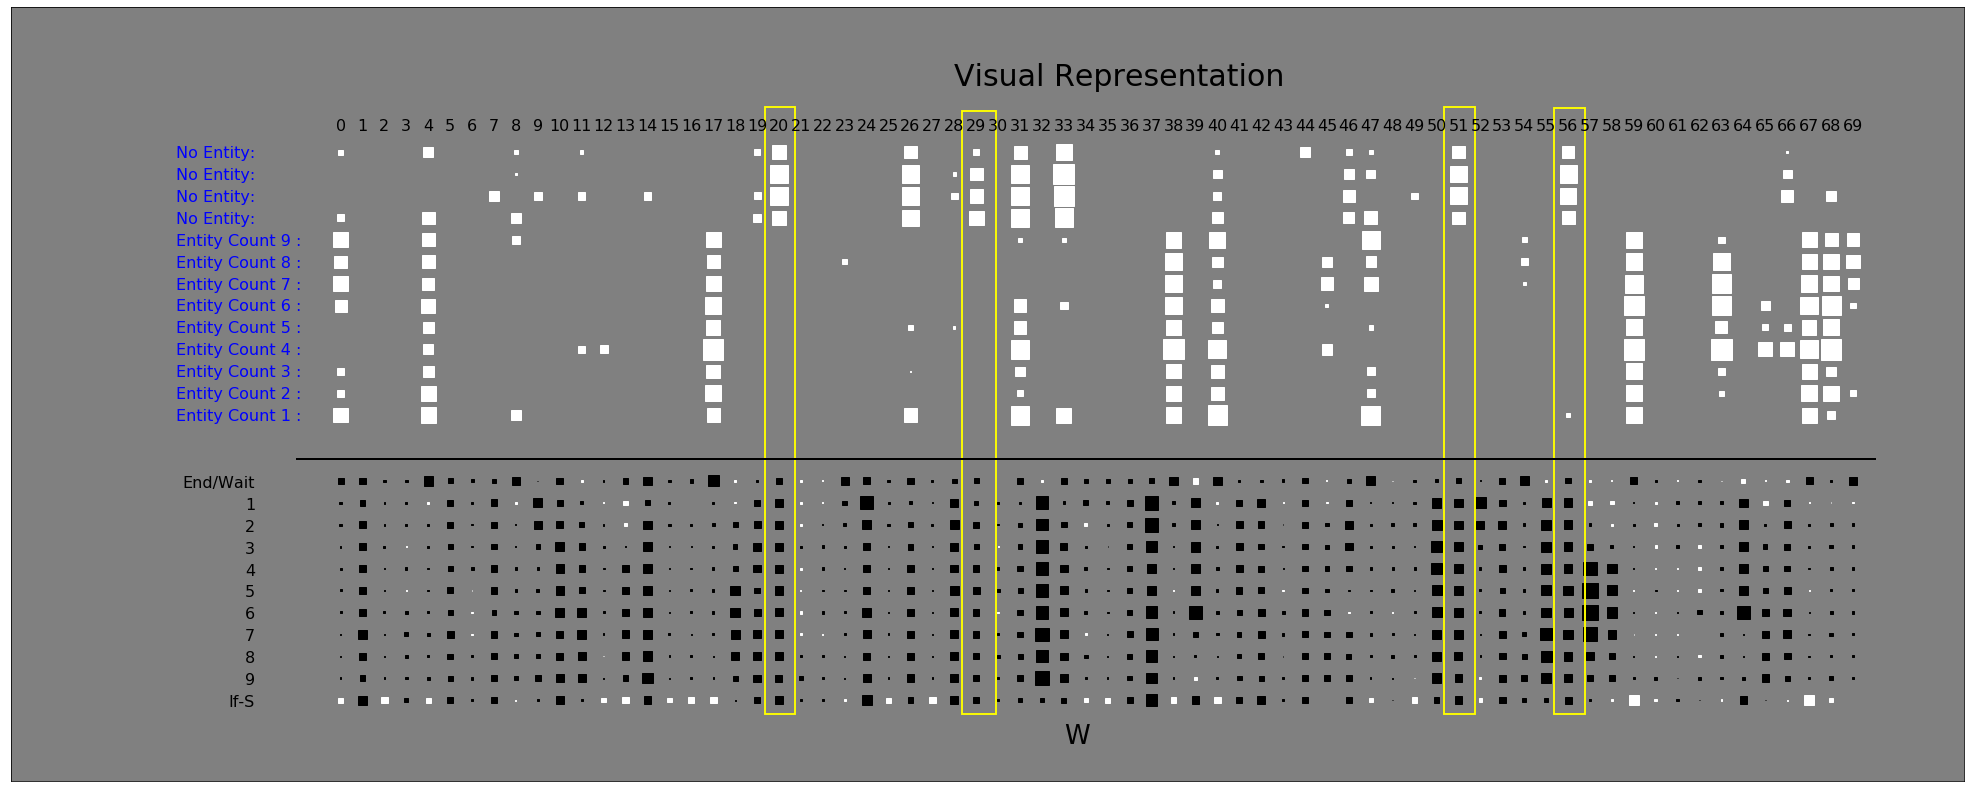

In [1063]:
multiple_graph_lists = [graph_list_count_all_objects]

############################
## Plot Hinton diagrams
############################
asked_numbers=[1,2,3,4,5,6,7,8,9,'no_count', 'no_count', 'no_count','no_count']
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(1,2),
                                       axis=None, 
                                       figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[20,51,56,29])

PATH = RESULTS_PATH + 'ALIFE_paper/entity_repr_count_all_objects.png'
fig.savefig(PATH, format='png')

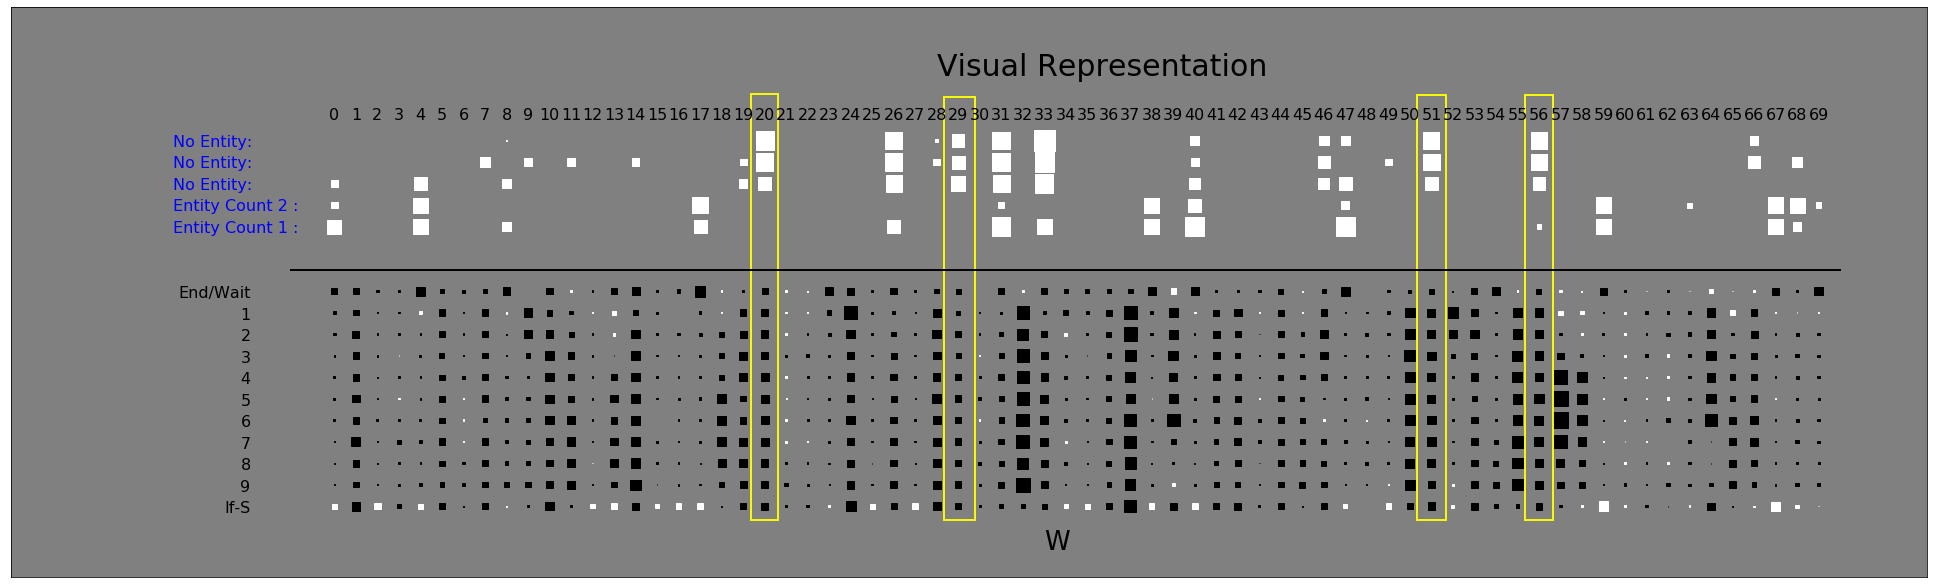

In [1061]:
multiple_graph_lists = [graph_list_count_all_objects]

############################
## Plot Hinton diagrams
############################
asked_numbers=[1,2,'no_count', 'no_count', 'no_count']
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(1,2),
                                       axis=None, 
                                       figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[20,51,56,29])

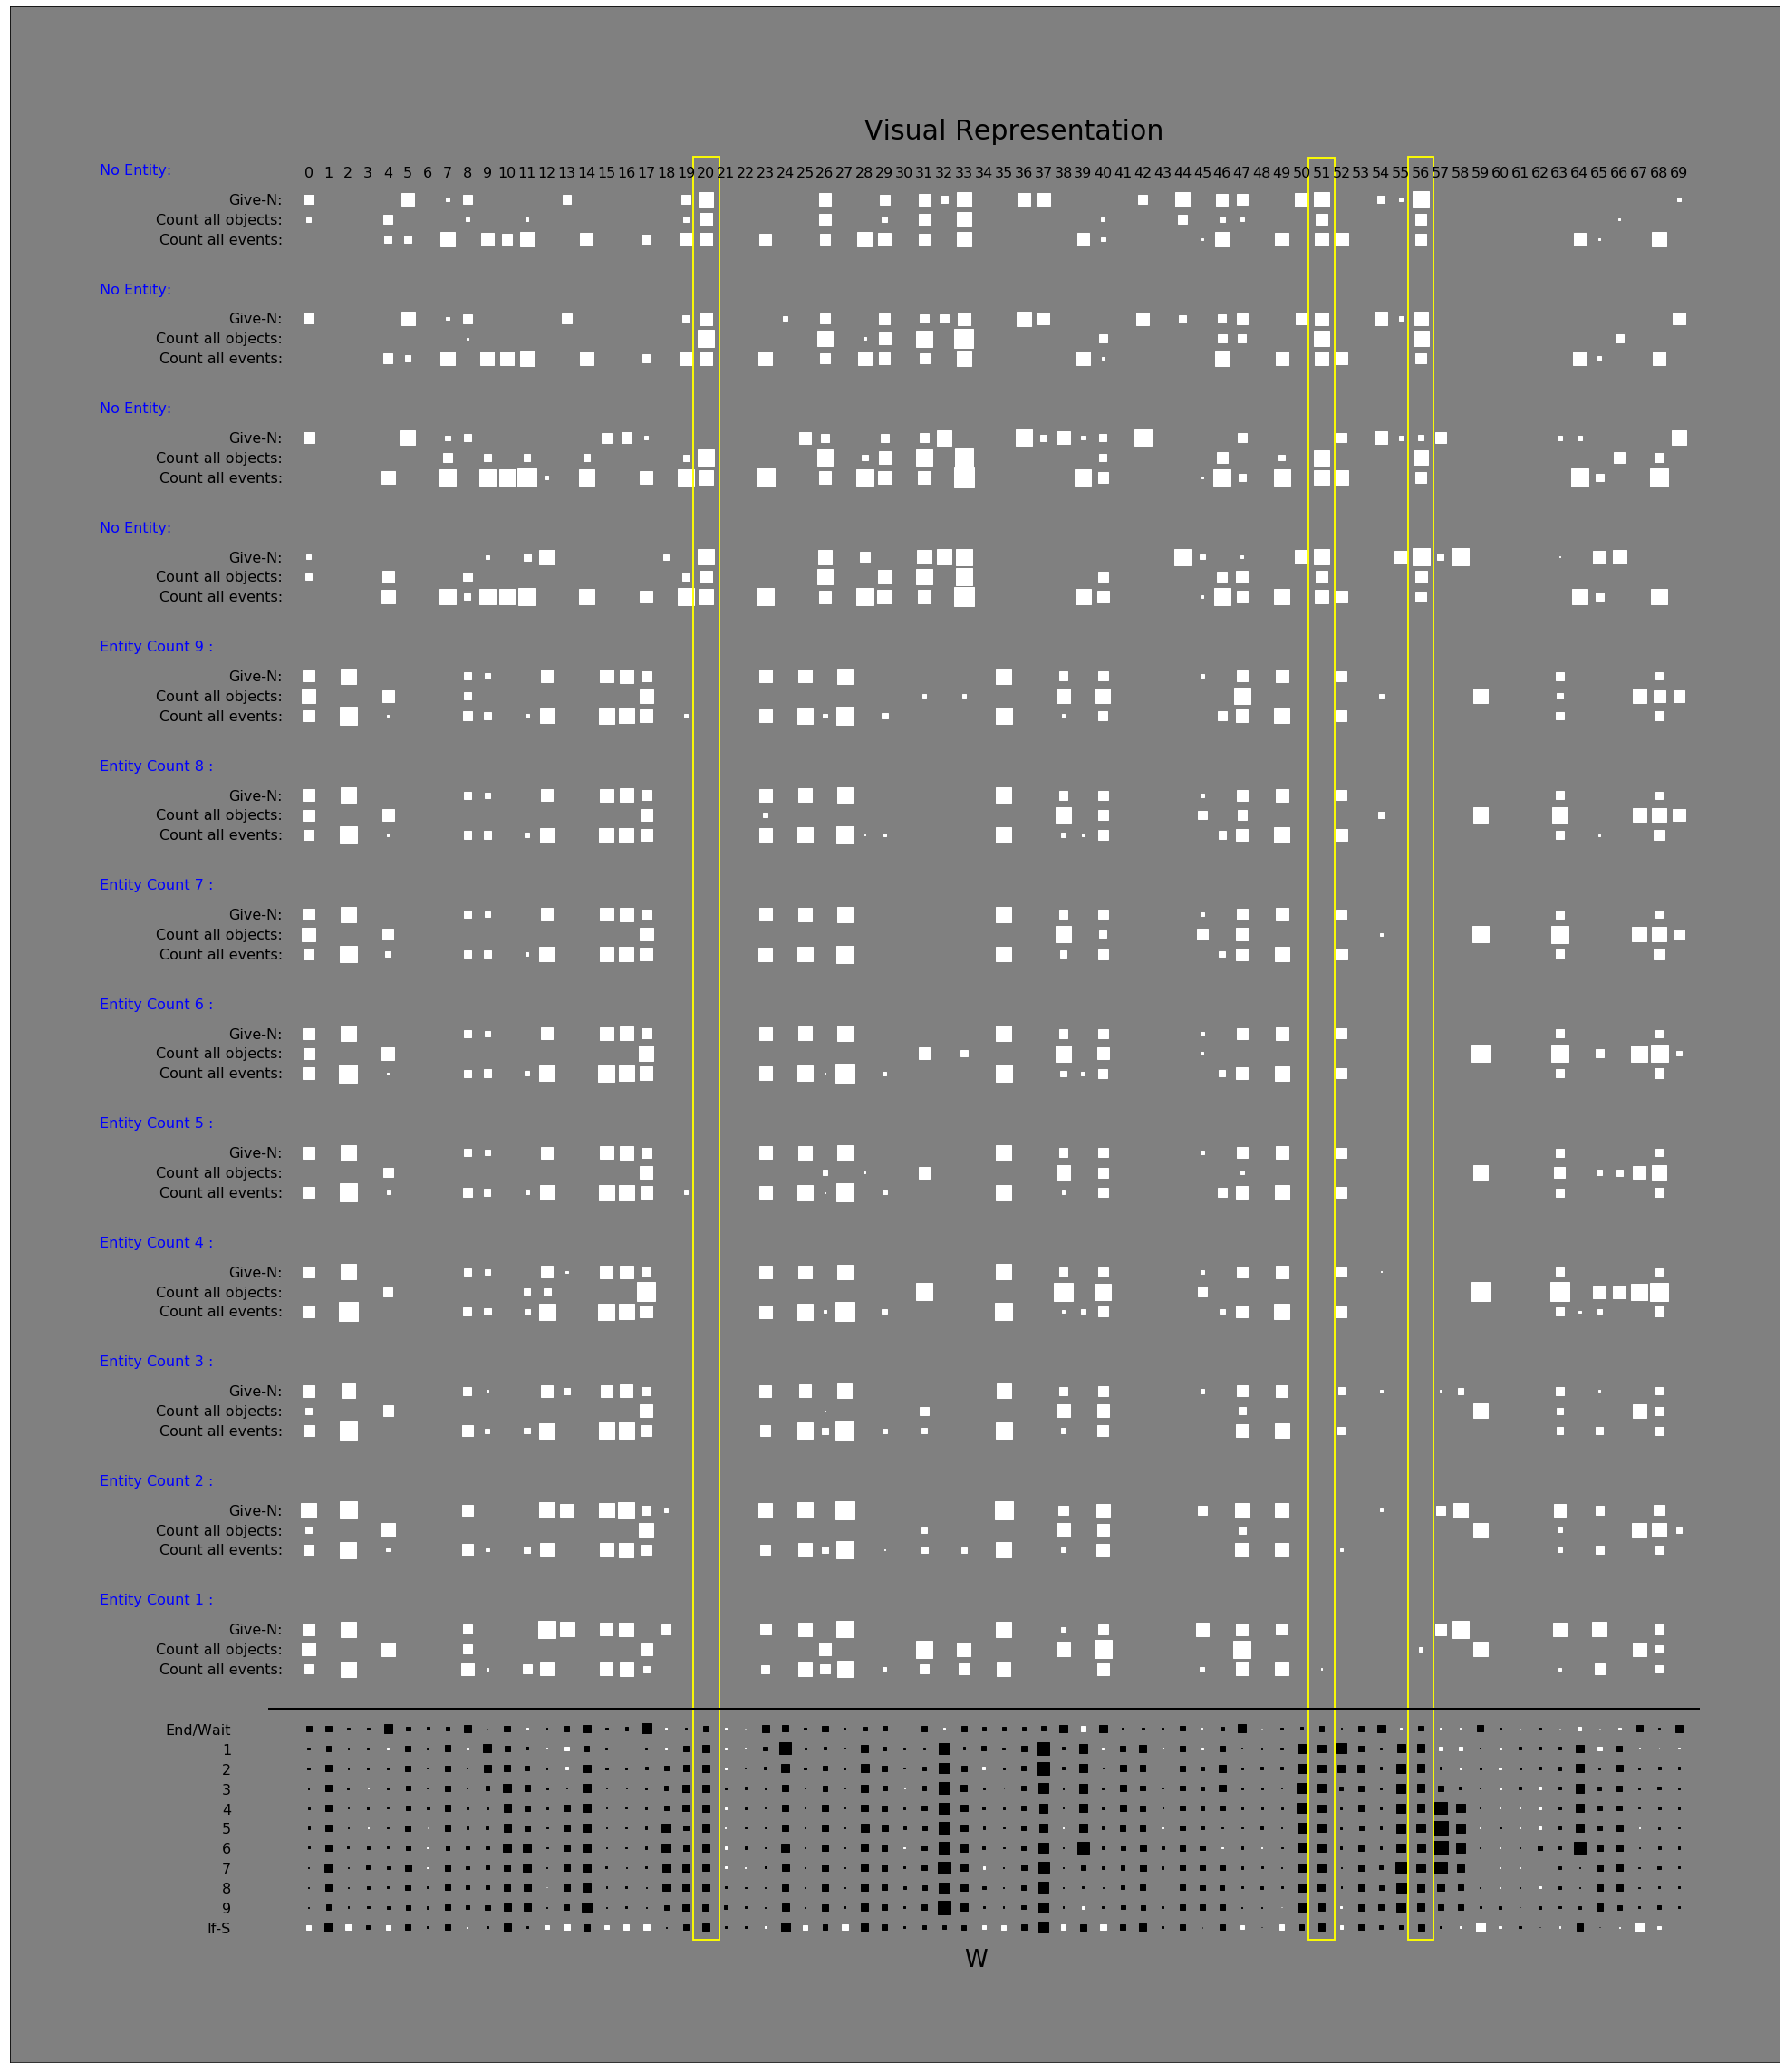

In [832]:
multiple_graph_lists = [graph_list_count_all_events, graph_list_count_all_objects, graph_list_give_n]
############################
## Plot Hinton diagrams
############################
asked_numbers=[1,2,3,4,5,6,7,8,9,'no_count', 'no_count', 'no_count', 'no_count']
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(1,2),
                                       axis=None, 
                                       figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[20,51,56])

PATH = RESULTS_PATH + 'ALIFE_paper/entity_repr_all_tasks.eps'
fig.savefig(PATH, format='eps')

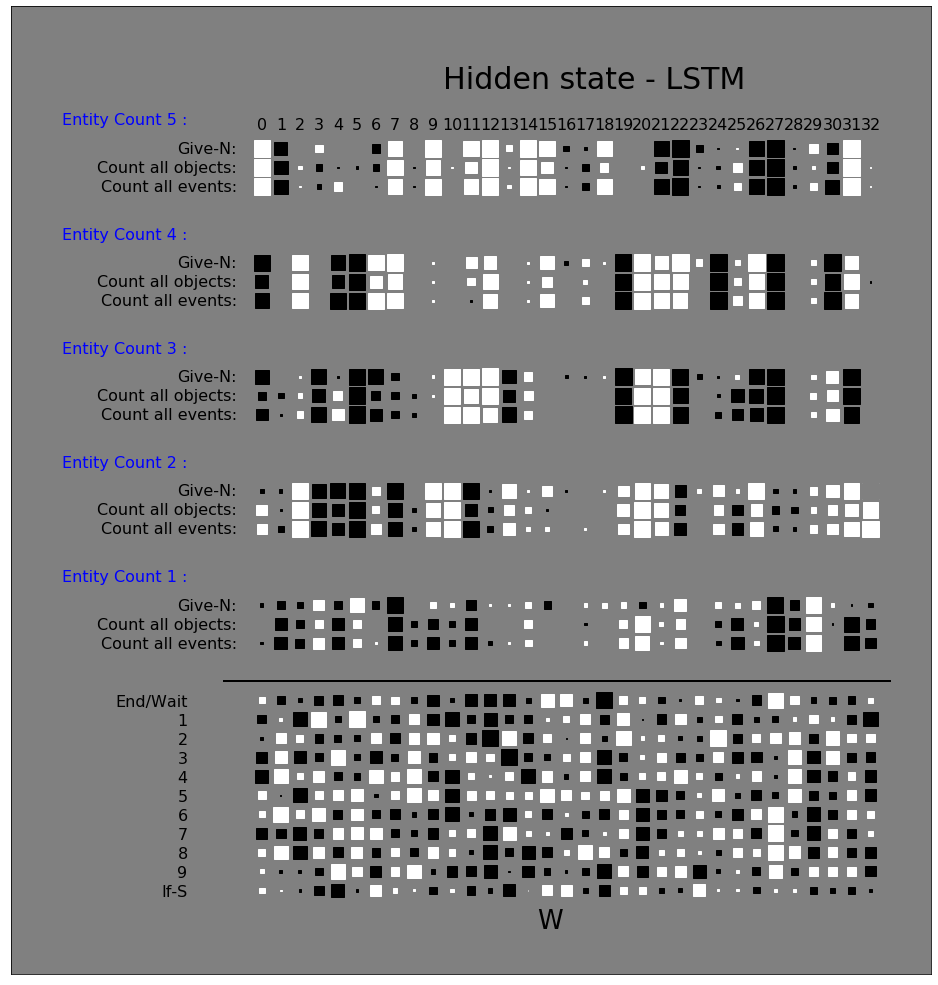

In [1060]:
multiple_graph_lists = [graph_list_count_all_events, graph_list_count_all_objects, graph_list_give_n]
#for n in range(1,4):
asked_numbers=[1,2,3,4,5]
#asked_numbers=[1]

nodes_get_turned_on_from_1_to_2 = [2,13,30,31,32]
nodes_get_turned_off_from_1_to_2 = [3,5,22,29]

nodes_get_turned_on_from_7_to_8 = [1,3,7,9,17,21,26,28]
nodes_get_turned_off_from_7_to_8 = [3,5,13,31]

fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(0,2),
                                       axis=None, figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=None)


PATH = RESULTS_PATH + 'ALIFE_paper/num_repr_count_all_objects.eps'
fig.savefig(PATH, format='eps')

In [1078]:
#######################
### Get tuning curve
####################


task_list=["count_all_events", "count_all_objects", "give_n"]
n_tests=5
n_squares=9
layers=[0,1,2]
#neuron_n = 51 #20, 56


def get_df_from_test_trials(task_list, n_tests, n_squares, layers, neuron_n):
    neuron_n = 0
    
    df = pd.DataFrame()
    for tasky in task_list:
        print(tasky)

        for n in range(n_tests):
            if(n%10==0):
                print(n)
            graph_list = get_graph_from_task_trial(PATH, tasky, n_squares)
            graph_list_instance = GraphListClass(graph_list, readable_task[tasky])
            for a in range(1,10):
                #print(tasky)
                #print(a)
                if(len(graph_list_instance.time_steps_count_and_no_count[a])>0):
                    time_step = graph_list_instance.time_steps_count_and_no_count[a][0]

                    for layer in layers:
                        input_nodes = graph_list_instance.node_activations[layer][time_step]
                        graphy = graph_list_instance.graph_list[0]
                        layer_description = graphy.layer_descriptions[layer][0]
                        #if(len(graphy.txt)>0):
                        #    node_names = np.asarray([graphy.txt[i] for i in graphy.nodes_in_layer[layer]])
                        #if(len(graphy.txt)>0):
                        #    node_names = np.asarray([graphy.txt[i] for i in graphy.nodes_in_layer[layer]])
                        #else:
                        #    node_names = [" "]*len(graphy.nodes_in_layer[layer])

                        #for neuron_n in range(input_nodes.size):
                        node_activity= input_nodes[neuron_n]
                        df_ = pd.DataFrame(
                                {
                                    "task": tasky,
                                    "asked_number": str(a),
                                    "neuron_n": [neuron_n],
                                    "node_activities": [node_activity],
                                    "layer": layer,
                                    "layer_name": layer_description,
                                    "node_activities_vector": [np.array(input_nodes)]
                                })
                        df = df.append(df_)

            for layer in layers:
                a='no_count'    
                n_a = random.randint(0,len(graph_list_instance.time_steps_count_and_no_count[a])-1)
                time_step = graph_list_instance.time_steps_count_and_no_count[a][n_a]
                input_nodes = graph_list_instance.node_activations[layer][time_step]

                graphy = graph_list_instance.graph_list[0]
                layer_description = graphy.layer_descriptions[layer]

                #for neuron_n in range(input_nodes.size):
                node_activity= input_nodes[neuron_n]
                df_ = pd.DataFrame(
                        {
                            "task": tasky,
                            "asked_number": str(a),
                            "neuron_n": [neuron_n],
                            "node_activities": [node_activity],
                            "layer": layer,
                            "node_activities_vector": [np.array(input_nodes)]
                        })
                df = df.append(df_)
    return df
        

In [561]:
df_new_1 = get_df_from_test_trials(task_list, 2, n_squares, layers, neuron_n)

<Figure size 864x864 with 0 Axes>

In [744]:
df_new_2 = get_df_from_test_trials(task_list, 10, n_squares, layers, neuron_n)

C:\Programs\Anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



<Figure size 864x864 with 0 Axes>

In [1079]:
df_new_3 = get_df_from_test_trials(task_list, 100, n_squares, layers, neuron_n)

count_all_events
0
10
20
30
40
50
60
70
80
90
count_all_objects
0
10
20
30
40
50
60
70
80
90
give_n
0
10
20
30
40
50
60
70
80
90


<Figure size 864x864 with 0 Axes>

In [454]:
df_new['task'].unique()

array(['count_all_events', 'count_all_objects', 'give_n'], dtype=object)

In [551]:
print(df_new_1[(df_new_1.task=='give_n') & (df_new_1.asked_number=='1')].head()) #node_activities_vector.values

     task asked_number  neuron_n  node_activities  layer           layer_name  \
0  give_n            1         0            -0.01      0  Hidden state - LSTM   
0  give_n            1         1            -0.33      0  Hidden state - LSTM   
0  give_n            1         2            -0.10      0  Hidden state - LSTM   
0  give_n            1         3             0.43      0  Hidden state - LSTM   
0  give_n            1         4            -0.29      0  Hidden state - LSTM   

                              node_activities_vector  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  


In [1091]:
def get_node_activity_vector(df, task, asked_number, layer):
    return df[(df_new_1.task==task) & (df.asked_number==asked_number)& (df.layer==layer)& (df.neuron_n==0)].node_activities_vector

In [ ]:
font_size_legend = 15
font_size_axis_label = 15
font_size_axis_ticks = 15

fig, ax = plt.subplots(figsize=(16,10) )
for tasky in task_list:
    errs = df[df.task==tasky].groupby('asked_number').node_activities.std().values
    means = df[df.task==tasky].groupby('asked_number').node_activities.mean().values
    ax.errorbar(df[df.task==tasky].asked_number.unique(), means, yerr=errs, barsabove=True,capsize=5, label=tasky)
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.mean().plot(yerr=errs,xticks=range(11), label=tasky,fmt='ro-')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.std().plot(kind='bar',xticks=range(11), label=tasky)
    #plt.errorbar(df[df.task==tasky].groupby('asked_number').node_activities.std(), range(11))
    
ax.legend(prop={'size': font_size_legend})   
ax.xaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.yaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.set_xlabel("Output count words",fontsize=font_size_axis_label)
ax.set_ylabel("Node activity",fontsize=font_size_axis_label)

In [1086]:
df_new_3[(df_new_3.task==tasky) & (df_new_3.asked_number=='2')& (df_new_3.layer==1)].node_activities_vector.values[:][neuron_n]

array([2.45, 0.  , 3.55, 0.  , 0.  , 0.  , 0.  , 0.  , 1.39, 0.  , 0.  ,
       0.  , 2.53, 1.31, 0.  , 2.52, 2.92, 1.18, 0.  , 0.  , 0.  , 0.  ,
       0.  , 2.35, 0.  , 2.75, 0.  , 3.75, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 3.88, 0.  , 0.  , 1.11, 0.  , 1.84, 0.  , 0.  , 0.  ,
       0.  , 0.61, 0.  , 2.31, 0.  , 2.32, 0.  , 0.  , 0.36, 0.  , 0.15,
       0.  , 0.  , 0.44, 1.44, 0.  , 0.  , 0.  , 0.  , 1.5 , 0.  , 0.4 ,
       0.  , 0.  , 0.99, 0.  ])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


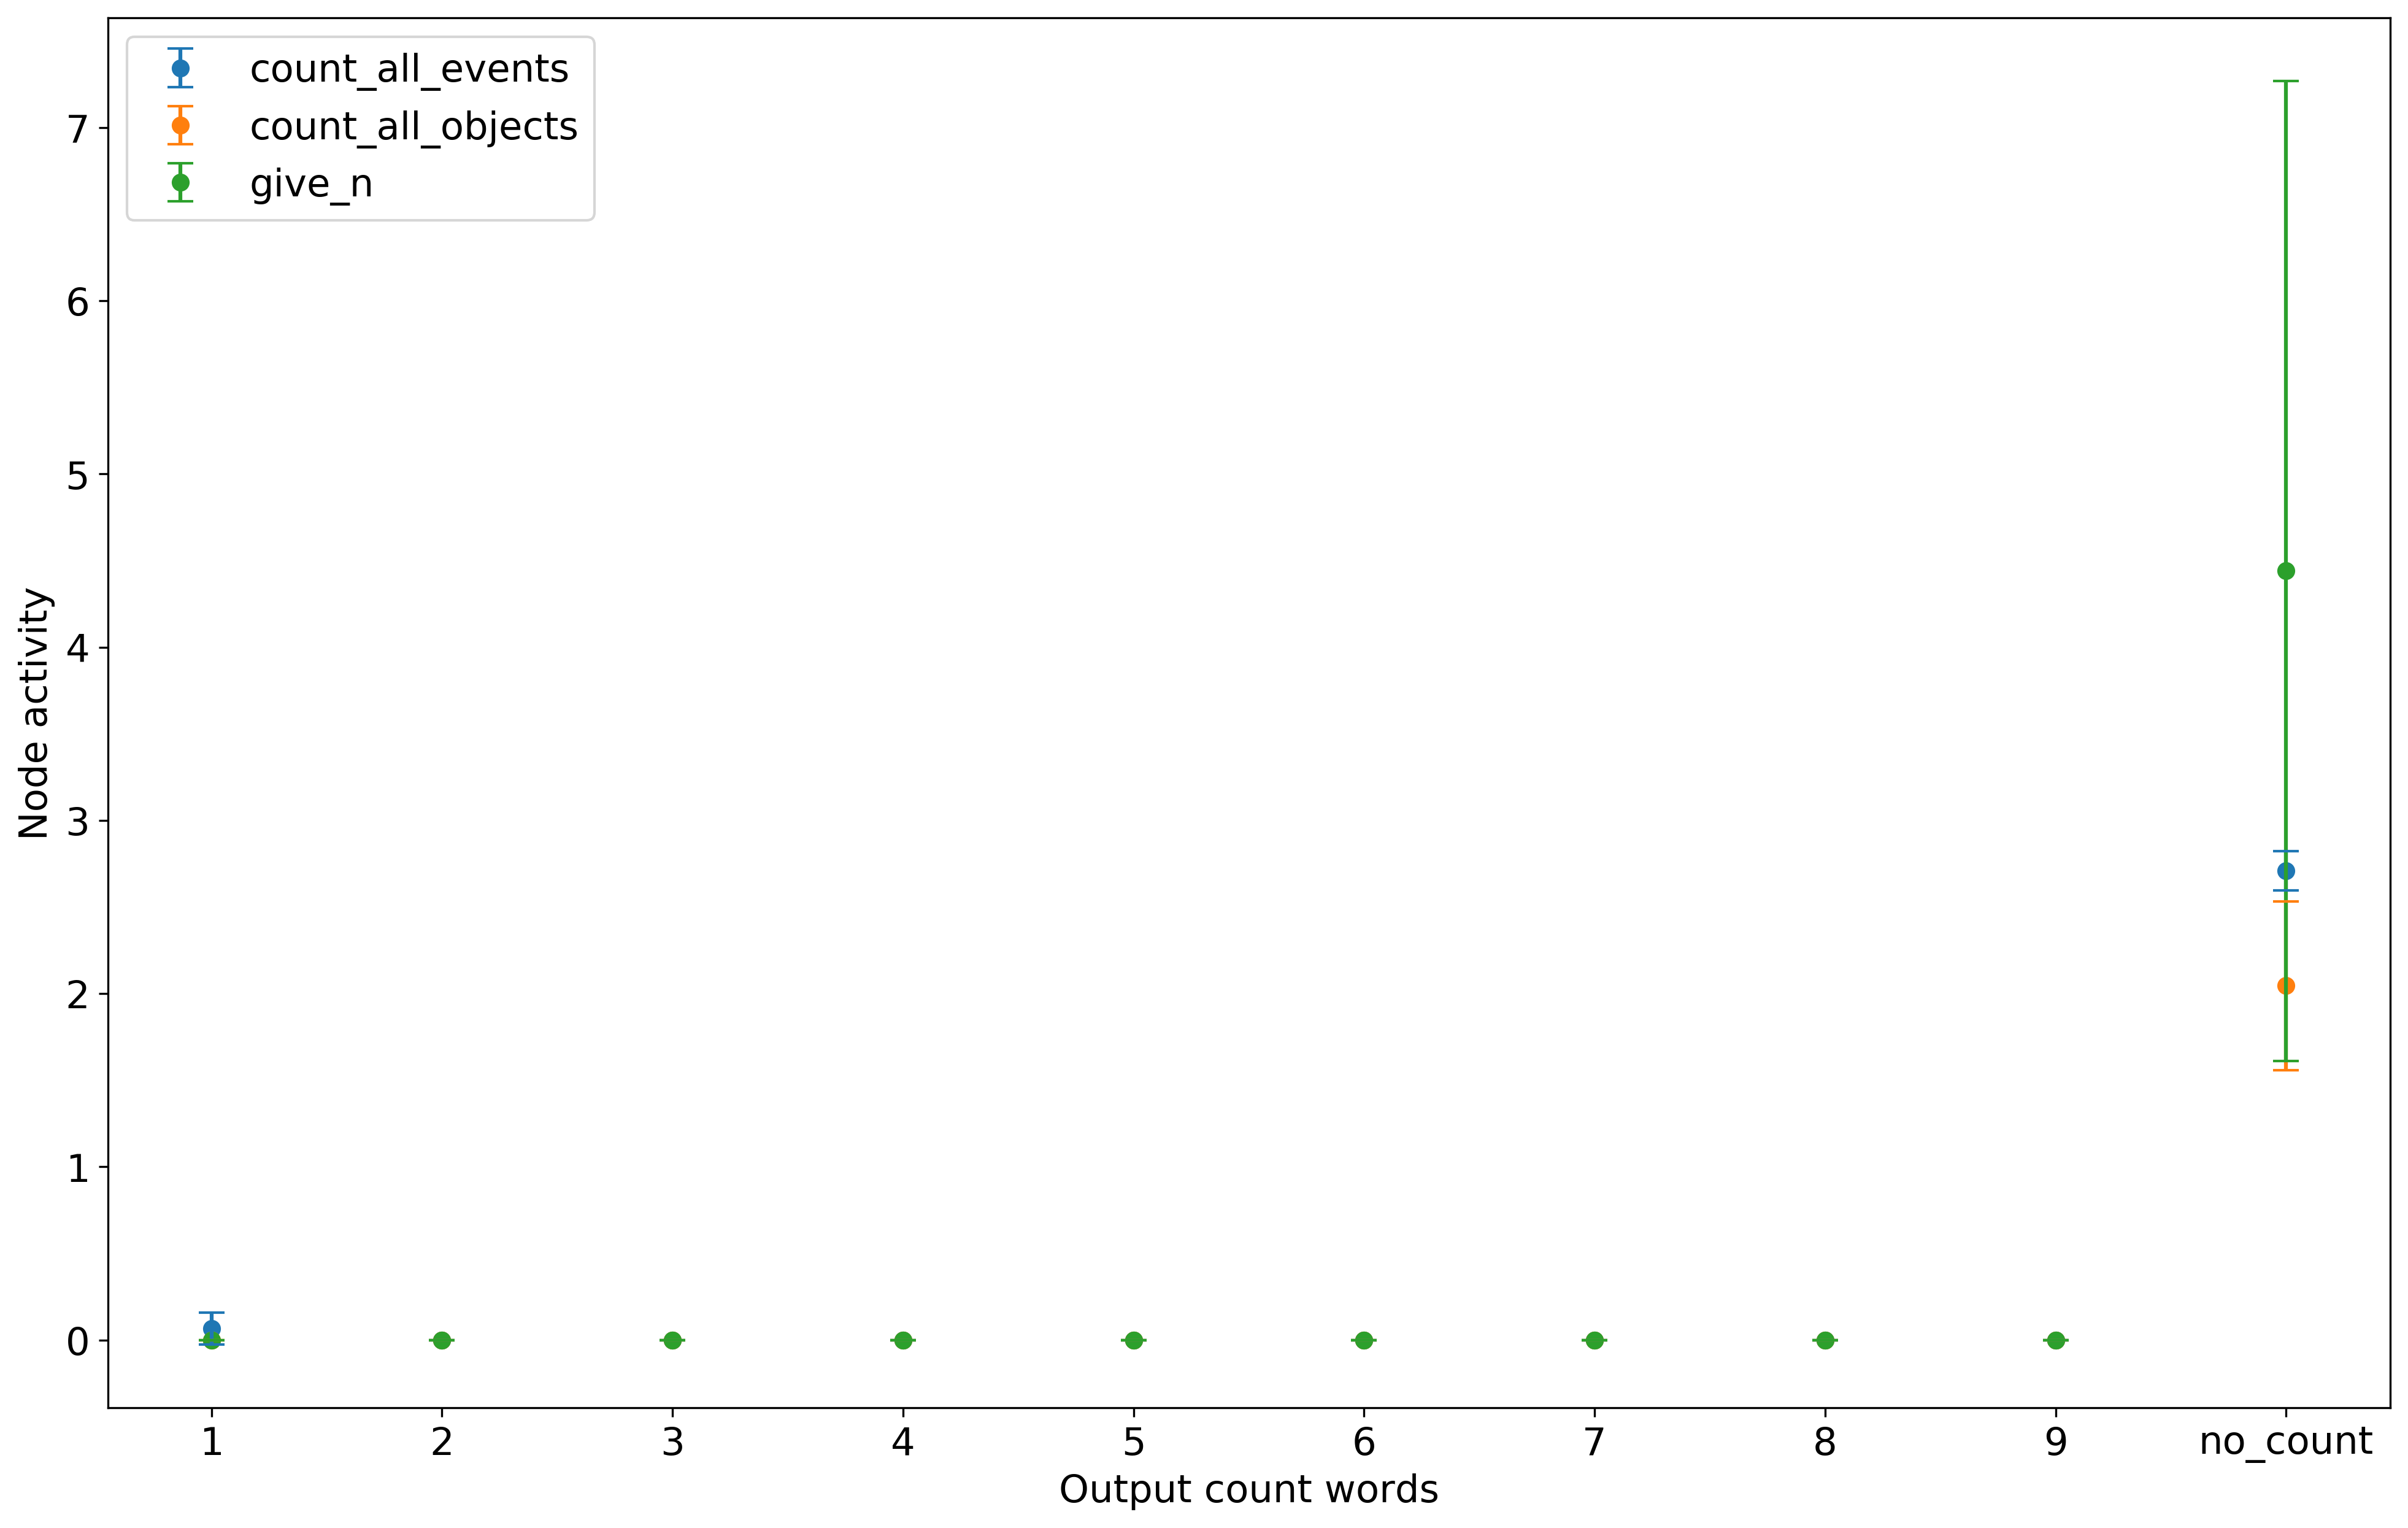

In [833]:
neuron_n=51

font_size_legend = 15
font_size_axis_label = 15
font_size_axis_ticks = 15

fig, ax = plt.subplots(figsize=(16,10), dpi=300 )
for tasky in task_list:
    errs = df[(df.task==tasky) & (df.neuron_n==neuron_n)].groupby('asked_number').node_activities.std().values
    means = df[(df.task==tasky) & (df.neuron_n==neuron_n)].groupby('asked_number').node_activities.mean().values
    ax.errorbar(df[(df.task==tasky) & (df.neuron_n==neuron_n)].asked_number.unique(), 
                means, 
                yerr=errs, 
                barsabove=True,
                capsize=5, 
                label=tasky,
                marker='o', linestyle='None')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.mean().plot(yerr=errs,xticks=range(11), label=tasky,fmt='ro-')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.std().plot(kind='bar',xticks=range(11), label=tasky)
    #plt.errorbar(df[df.task==tasky].groupby('asked_number').node_activities.std(), range(11))
    
ax.legend(prop={'size': font_size_legend})   
ax.xaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.yaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.set_xlabel("Output count words",fontsize=font_size_axis_label)
ax.set_ylabel("Node activity",fontsize=font_size_axis_label)


PATH = RESULTS_PATH + 'ALIFE_paper/abstract_entity_node_across_nums.eps'
fig.savefig(PATH, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


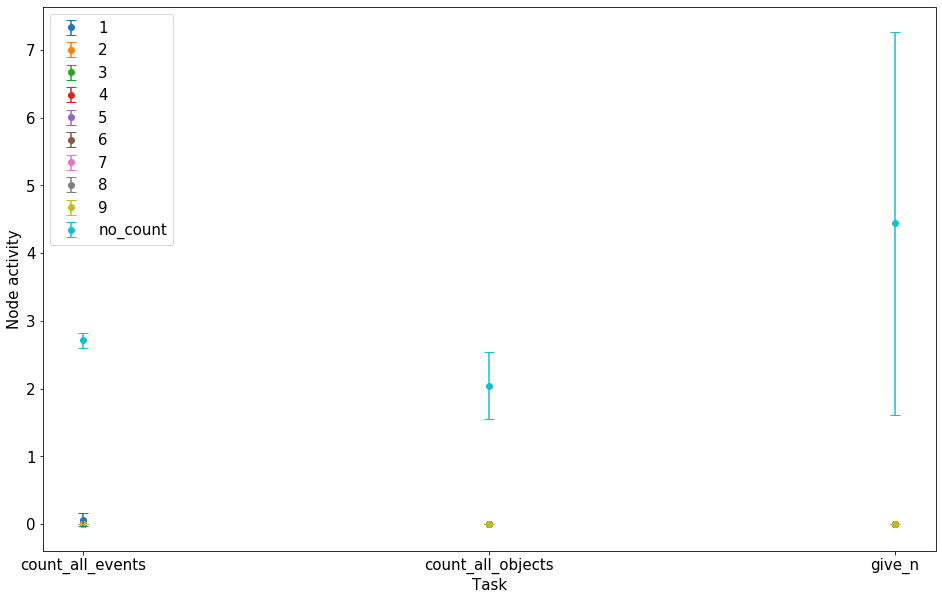

In [834]:
font_size_legend = 15
font_size_axis_label = 15
font_size_axis_ticks = 15

fig, ax = plt.subplots(figsize=(16,10) )
for a in df.asked_number.unique():
    errs = df[(df.asked_number==a) & (df.neuron_n==neuron_n)].groupby('task').node_activities.std().values
    means = df[(df.asked_number==a) & (df.neuron_n==neuron_n)].groupby('task').node_activities.mean().values
    ax.errorbar(df[(df.asked_number==a) & (df.neuron_n==neuron_n)].task.unique(), 
                means, 
                yerr=errs, 
                barsabove=True,
                capsize=5, 
                label=a,
                marker='o', linestyle='None')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.mean().plot(yerr=errs,xticks=range(11), label=tasky,fmt='ro-')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.std().plot(kind='bar',xticks=range(11), label=tasky)
    #plt.errorbar(df[df.task==tasky].groupby('asked_number').node_activities.std(), range(11))
    
ax.legend(prop={'size': font_size_legend}, loc='upper left')   
ax.xaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.yaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.set_xlabel("Task",fontsize=font_size_axis_label)
ax.set_ylabel("Node activity",fontsize=font_size_axis_label)

PATH = RESULTS_PATH + 'ALIFE_paper/abstract_entity_node_across_tasks.eps'
fig.savefig(PATH, format='eps')

In [1242]:
### Run abstract entity nodes with big data set.
### schlüssel

df = df_new_3
task='give_n'
neuron_n = 51
asked_number = 'no_count'

vec0 = df[(df.asked_number==asked_number)&(df.layer==1)&(df.task=='give_n')].node_activities_vector
vec1 = np.vstack(df[(df.asked_number==asked_number)&(df.layer==1)&(df.task=='give_n')].node_activities_vector)
print(vec1.shape)

vec1_neuron_n = vec1[:,neuron_n]
print(vec1_neuron_n.shape)
print(vec1_neuron_n.mean() )
print(vec1_neuron_n.std() )
print(vec0.mean()[51])


#for i in range(1,10):
print(vec1.mean())
argmax=print(np.argmax(vec0.mean()))

#print(np.max(vec0.mean()))



(100, 70)
(100,)
3.8566000000000003
2.5563365271419176
3.8566000000000007
1.147257142857143
5


In [1219]:
df[(df.asked_number=='no_count')&(df.layer==1)&(df.task=='give_n')].node_activities_vector.mean()[51]

3.8566000000000007

In [1245]:


### Run abstract entity nodes with big data set.
### schlüssel

df = df_new_3
task='give_n'
neuron_ns = [20,29,51, 56]

layer = 1


for neuron_n in neuron_ns:
    print("\n \n")
    print('Neuron nr: ', neuron_n)
    mean_mean_avg = 0
    mean_mean_std = 0
    
    mean_mean_avg_no_count = 0
    mean_mean_std_no_count = 0    
    
    for tasky in task_list:
        print("\n ")
        print("Task: ", tasky)
        asked_number = 'no_count'
        vec0 = np.vstack(df[(df.asked_number==asked_number)&(df.layer==layer)&(df.task==tasky)].node_activities_vector)
        vec1_neuron_n = vec0[:,neuron_n]
        mean_no_count=vec1_neuron_n.mean()
        std= vec1_neuron_n.std()
        
        mean_mean_avg_no_count+=mean_no_count
        mean_mean_std_no_count+=std

        #print(mean)
        #print(std)

        mean_avg = 0
        std_avg = 0
        for i in range(1,10):
            asked_number = str(i)
            vec0 = np.vstack(df[(df.asked_number==asked_number)&(df.layer==layer)&(df.task==tasky)].node_activities_vector)
            vec1_neuron_n = vec0[:,neuron_n]
            meany=vec1_neuron_n.mean()
            stdy= vec1_neuron_n.std()
            mean_avg = mean_avg + meany
            std_avg = std_avg + stdy
        mean_avg = mean_avg/9
        std_avg = std_avg/9
        mean_mean_avg+=mean_avg
        mean_mean_std+=std_avg
        print('No Count mean activity: ', mean_no_count, 'pm', std)
        print('Count mean activity: ', mean_avg, 'pm', std_avg)
        #print(mean_avg)
        #print(std_avg)
    print("")
    mean_mean_avg_no_count /= 3
    mean_mean_std_no_count /= 3
    mean_mean_avg /= 3
    mean_mean_std /= 3
    print('AVG No Count mean activity: ', mean_mean_avg_no_count, 'pm', mean_mean_std_no_count)
    print('AVG Count mean activity: ', mean_mean_avg, 'pm', mean_mean_std)


 

Neuron nr:  20

 
Task:  count_all_events
No Count mean activity:  2.5403000000000002 pm 0.7476997458873448
Count mean activity:  0.0 pm 0.0

 
Task:  count_all_objects
No Count mean activity:  2.577 pm 1.020572878338436
Count mean activity:  0.01012748538011696 pm 0.03622926920171705

 
Task:  give_n
No Count mean activity:  4.338100000000001 pm 2.7776107340662404
Count mean activity:  0.0 pm 0.0

AVG No Count mean activity:  3.1518 pm 1.5152944527640073
AVG Count mean activity:  0.003375828460038987 pm 0.012076423067239016

 

Neuron nr:  29

 
Task:  count_all_events
No Count mean activity:  2.215 pm 0.6689417014957283
Count mean activity:  0.19442222222222222 pm 0.11015861224201116

 
Task:  count_all_objects
No Count mean activity:  0.7024999999999999 pm 1.0610686829795704
Count mean activity:  0.016124555496485324 pm 0.09035152419971729

 
Task:  give_n
No Count mean activity:  2.443 pm 2.1480993924862974
Count mean activity:  0.0 pm 0.0

AVG No Count mean activity:  1.786833

In [1230]:


### Run abstract entity nodes with big data set.
### schlüssel

df = df_new_3
task='give_n'
neuron_ns = [20,29,51, 56]

layer = 1


for neuron_n in neuron_ns:
    print("\n \n")
    print('Neuron nr: ', neuron_n)
    for tasky in task_list:
        print("\n ")
        print("Task: ", tasky)
        asked_number = 'no_count'
        vec0 = df[(df.asked_number==asked_number)&(df.layer==layer)&(df.task==tasky)].node_activities_vector
        mean_no_count= vec0.mean()[neuron_n]
        std= vec0.values.flatten().std()[neuron_n]

        #print(mean)
        #print(std)

        mean_avg = 0
        std_avg = 0
        for i in range(1,10):
            asked_number = str(i)
            vec0 = df[(df.asked_number==asked_number)&(df.layer==layer)&(df.task==tasky)].node_activities_vector
            mean= vec0.mean()[neuron_n]
            #std= vec0.std()[neuron_n]

            mean_avg = mean_avg + mean
            #std_avg = std_avg + std
        mean_avg = mean_avg/9
        std_avg = std_avg/9
        print('No Count mean activity: ', mean_no_count, 'pm', std)
        print('Count mean activity: ', mean_avg, 'pm', std_avg)
        #print(mean_avg)
        #print(std_avg)


 

Neuron nr:  20

 
Task:  count_all_events
No Count mean activity:  2.5402999999999993 pm 0.7476997458873449
Count mean activity:  0.0 pm 0.0

 
Task:  count_all_objects
No Count mean activity:  2.577000000000001 pm 1.020572878338436
Count mean activity:  0.010127485380116963 pm 0.0

 
Task:  give_n
No Count mean activity:  4.338100000000004 pm 2.7776107340662413
Count mean activity:  0.0 pm 0.0

 

Neuron nr:  29

 
Task:  count_all_events
No Count mean activity:  2.2150000000000007 pm 0.6689417014957283
Count mean activity:  0.19442222222222222 pm 0.0

 
Task:  count_all_objects
No Count mean activity:  0.7025 pm 1.0610686829795701
Count mean activity:  0.016124555496485324 pm 0.0

 
Task:  give_n
No Count mean activity:  2.4430000000000005 pm 2.148099392486298
Count mean activity:  0.0 pm 0.0

 

Neuron nr:  51

 
Task:  count_all_events
No Count mean activity:  2.4265999999999988 pm 0.6814546499951409
Count mean activity:  0.004077777777777777 pm 0.0

 
Task:  count_all_objects


In [615]:
## Get correlations-matrix from your specific dataframe:
# by giving the one class that stays the same (within_class) and one that you want to check for/vary (check_class)

within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
df_test = df
layer=0

def get_correlation_matrix(df_test,within_class,within_class_instance,check_class,layer,plot=False,ax=None ):
    first,second=df_test[check_class].unique(),df_test[check_class].unique()
    var_len = len(first)
    range_var_len = range(var_len)

    combined = [(f,s) for f in range_var_len for s in range_var_len]

    corr_matrix = np.empty([var_len,var_len ])
    for (i,j) in combined: 
        i_class_instance=df_test[check_class].unique()[i]
        j_class_instance=df_test[check_class].unique()[j]
        corry = df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==i_class_instance) & (df_test['layer']==layer)].node_activities.corr(df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==j_class_instance) & (df_test['layer']==layer)].node_activities, method='pearson')
        corr_matrix[i,j] = corry
    
    sub_title = " "
    if(within_class=='task'):
        sub_title += "for the task " + readable_task[within_class_instance]
    if(within_class=='asked_number'):
        sub_title += "when Number " + within_class_instance + " is counted"
        
    title=df_new[df_new['layer']==layer].layer_name.unique()[0] + "\n Layer correlation" + "\n " + sub_title
    tick_labels = df_test[check_class].unique()
    if(ax is None):
        ax = plt.axes()
    sb.heatmap(corr_matrix, 
                xticklabels=tick_labels,
                yticklabels=tick_labels,
                cmap='RdBu_r',
                annot=True,
                linewidth=0.5,
                  ax=ax)

    ax.set_title(title)
    
    
    return corr_matrix


In [ ]:
def get_node_activity_vector(df, within_class, within_class_instance, check_class, class_instance, layer):
    return df[(df[within_class]==within_class_instance) & (df[check_class]==class_instance) & (df['layer']==layer)].node_activities_vector

In [1113]:
within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
i_class_instance='1'
df_test = df_new_3
layer=0

vec1 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, i_class_instance, layer).values
print(np.array(vec1).shape)

#corry = np.corrcoef(vec1, vec1)[0, 1]

(100,)


In [1127]:
## Get correlations-matrix from your specific dataframe:
# by giving the one class that stays the same (within_class) and one that you want to check for/vary (check_class)

within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
df_test = df
layer=0

def get_correlation_matrix(df_test,within_class,within_class_instance,check_class,layer,plot=False,ax=None,
                                         xaxis_labels=True,
                                         yaxis_labels=True ):
    first,second=df_test[check_class].unique(),df_test[check_class].unique()
    var_len = len(first)
    range_var_len = range(var_len)

    combined = [(f,s) for f in range_var_len for s in range_var_len]

    corr_matrix = np.empty([var_len,var_len ])
    for (i,j) in combined: 
        i_class_instance=df_test[check_class].unique()[i]
        j_class_instance=df_test[check_class].unique()[j]
        try:
            vec1 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, i_class_instance, layer).values
        except IndexError:
            print(within_class, within_class_instance, check_class, i_class_instance, layer)
        vec2 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, j_class_instance, layer).values
        #corry = df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==i_class_instance) & (df_test['layer']==layer)].node_activities.corr(df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==j_class_instance) & (df_test['layer']==layer)].node_activities, method='pearson')
        min_vec_size = min(np.vstack(vec1).flatten().size, np.vstack(vec2).flatten().size)
        
        corry = np.corrcoef(np.vstack(vec1).flatten()[:min_vec_size], np.vstack(vec2).flatten()[:min_vec_size])[0, 1]
        corr_matrix[i,j] = corry
    
    sub_title = " "
    if(within_class=='task'):
        sub_title +=  readable_task[within_class_instance]
    if(within_class=='asked_number'):
        sub_title += "Count " + within_class_instance

        
    title=df_new[df_new['layer']==layer].layer_name.unique()[0] + "\n Layer correlation" + "\n " + sub_title
    title=sub_title
    tick_labels = df_test[check_class].unique()
    if(check_class=='task'):
        tick_labels = [readable_task[df_test[check_class].unique()[i]] for i in range(len(df_test[check_class].unique()))]
    if(check_class=='task'):
        for i in range(len(tick_labels)):
            if(tick_labels[i]=='Count all events'):
                tick_labels[i]='Events'
            if(tick_labels[i]=='Count all objects'):
                tick_labels[i]='Objects'
    
    for i in range(len(tick_labels)):
        if(tick_labels[i]=='no_count'):
            tick_labels[i]='No count'
        
        
    if(ax is None):
        ax = plt.axes()
    
    if(xaxis_labels==False):
        x_tick_labels = []
    else: 
        x_tick_labels = tick_labels
        
    if(yaxis_labels==False):
        y_tick_labels = []
    else: 
        y_tick_labels = tick_labels    
    
    sb.heatmap(corr_matrix,      #[:-1,:-1]
                xticklabels=x_tick_labels,   # [:-1]
                yticklabels=y_tick_labels,  #[:-1]
                cmap='RdBu_r',
                linewidth=0.5,
                  ax=ax,
              vmin=-0.2,
              vmax=1.0,
              annot=False)

    font_size_axis_ticks = 26
    ax.set_title(title, fontsize=26)
    ax.xaxis.set_tick_params(labelsize=font_size_axis_ticks, rotation=90)
    ax.yaxis.set_tick_params(labelsize=font_size_axis_ticks, rotation=90)
    
    
    return corr_matrix



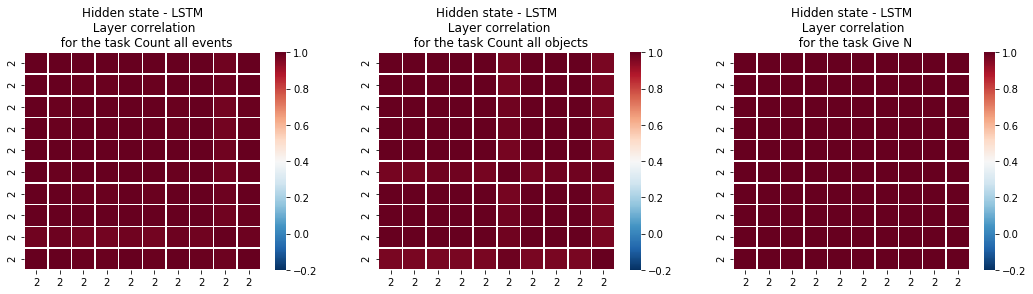

In [898]:
df_test = df_new_2
within_class_1,within_class_instance_1,within_class_2,within_class_instance_2 = 'asked_number','2', 'task', 'count_all_events'
layer=0

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

corr_matrix_same_numb_same_task = []


corr_matrix_same_numb_same_task_1 = get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=True,ax=ax[0] )

within_class_instance_2 = 'count_all_objects'
corr_matrix_same_numb_same_task_2 = get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=True,ax=ax[1] )

within_class_instance_2 = 'give_n'
corr_matrix_same_numb_same_task_3 = get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=True,ax=ax[2] )

corr_matrix_same_numb_same_task.append(corr_matrix_same_numb_same_task_1)
corr_matrix_same_numb_same_task.append(corr_matrix_same_numb_same_task_2)
corr_matrix_same_numb_same_task.append(corr_matrix_same_numb_same_task_3)

PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_lang_repr_same_num_same_task.eps'
fig.savefig(PATH, format='eps')


In [1048]:
def get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=False,ax=None ):
    first,second=df_test[check_class].unique(),df_test[check_class].unique()
    var_len = len(df_test[(df_test['asked_number']=='2') & (df_test['task']=='count_all_events') & (df_test['layer']==0)& (df_test['neuron_n']==0)].node_activities_vector.values)
    range_var_len = range(var_len)

    combined = [(f,s) for f in range_var_len for s in range_var_len]

    corr_matrix = np.empty([var_len,var_len ])
    for (i,j) in combined: 
        i_class_instance=df_test[check_class].unique()[i]
        j_class_instance=df_test[check_class].unique()[j]

        vec1 = df_test[(df_test[within_class_1]==within_class_instance_1) & (df_test[within_class_2]==within_class_instance_2) & (df_test['layer']==layer)& (df_test['neuron_n']==0)].node_activities_vector.values[i] 

        vec2 = df_test[(df_test[within_class_1]==within_class_instance_1) & (df_test[within_class_2]==within_class_instance_2) & (df_test['layer']==layer)& (df_test['neuron_n']==0)].node_activities_vector.values[j]
        #corry = df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==i_class_instance) & (df_test['layer']==layer)].node_activities.corr(df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==j_class_instance) & (df_test['layer']==layer)].node_activities, method='pearson')
        corry = np.corrcoef(vec1, vec2)[0, 1]
        corr_matrix[i,j] = corry
    
    sub_title = " "
    if(within_class=='task'):
        sub_title +=  readable_task[within_class_instance_2]
    if(within_class=='asked_number'):
        sub_title += "when Number " + within_class_instance_2 + " is counted"
        
    title=df_new[df_new['layer']==layer].layer_name.unique()[0] + "\n Layer correlation" + "\n " + sub_title
    tick_labels = var_len*[within_class_instance_1]
    if(ax is None):
        ax = plt.axes()
    sb.heatmap(corr_matrix, 
                xticklabels=tick_labels,
                yticklabels=tick_labels,
                cmap='RdBu_r',
                linewidth=0.5,
                  ax=ax,
              vmin=-0.2,
              vmax=1.0,
              annot=False)

    ax.set_title(title)
    
    
    return corr_matrix

In [1087]:
def get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=False,ax=None ):
    first,second=df_test[check_class].unique(),df_test[check_class].unique()
    var_len = len(df_test[(df_test['asked_number']=='2') & (df_test['task']=='count_all_events') & (df_test['layer']==0)].node_activities_vector.values)
    range_var_len = range(var_len)

    combined = [(f,s) for f in range_var_len for s in range_var_len]

    corr_matrix = np.empty([var_len,var_len ])
    for (i,j) in combined: 
        i_class_instance=df_test[check_class].unique()[i]
        j_class_instance=df_test[check_class].unique()[j]

        vec1 = df_test[(df_test[within_class_1]==within_class_instance_1) & (df_test[within_class_2]==within_class_instance_2) & (df_test['layer']==layer)].node_activities_vector.values[i] 

        vec2 = df_test[(df_test[within_class_1]==within_class_instance_1) & (df_test[within_class_2]==within_class_instance_2) & (df_test['layer']==layer)].node_activities_vector.values[j]
        #corry = df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==i_class_instance) & (df_test['layer']==layer)].node_activities.corr(df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==j_class_instance) & (df_test['layer']==layer)].node_activities, method='pearson')
        corry = np.corrcoef(vec1, vec2)[0, 1]
        corr_matrix[i,j] = corry
    
    sub_title = " "
    if(within_class=='task'):
        sub_title +=  readable_task[within_class_instance_2]
    if(within_class=='asked_number'):
        sub_title += "when Number " + within_class_instance_2 + " is counted"
        
    title=df_new[df_new['layer']==layer].layer_name.unique()[0] + "\n Layer correlation" + "\n " + sub_title
    tick_labels = var_len*[within_class_instance_1]
    if(ax is None):
        ax = plt.axes()
    sb.heatmap(corr_matrix, 
                xticklabels=tick_labels,
                yticklabels=tick_labels,
                cmap='RdBu_r',
                linewidth=0.5,
                  ax=ax,
              vmin=-0.2,
              vmax=1.0,
              annot=False)

    ax.set_title(title)
    
    
    return corr_matrix

In [1093]:
def get_node_activity_vector(df, within_class, within_class_instance, check_class, class_instance, layer):
    return df[(df[within_class]==within_class_instance) & (df[check_class]==class_instance) & (df['layer']==layer)].node_activities_vector

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(27, 11))
fig.tight_layout(pad=14.0)
#fig.subplots_adjust(left=None, bottom=None, right=None, top=8, wspace=None, hspace=8)

corr_matrices_task_inv = []

for n in range(1,10):
    within_class_instance = str(n) 
    corr_matrix = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax= ax[(n-1)//5,(n-1)%5] )
    corr_matrices_task_inv.append(corr_matrix)
    
PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_lang_repr_same_num_diff_task.eps'
fig.savefig(PATH, format='eps')

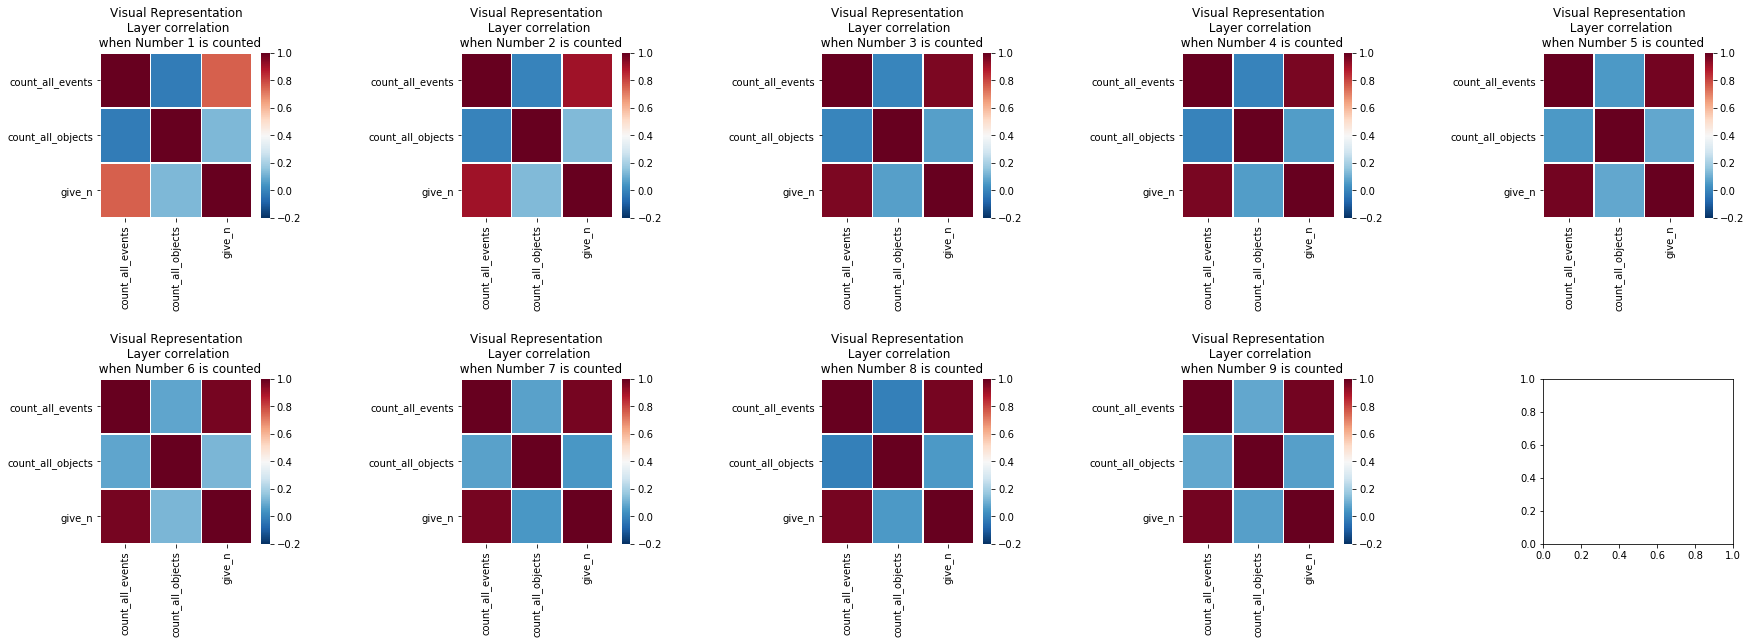

In [871]:
within_class = 'asked_number'
within_class_instance = '1'
check_class = 'task'
df_test = df_new_1
layer = 1

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(27, 11))
fig.tight_layout(pad=14.0)


corr_matrices = []
for i in range(1,10):

    within_class_instance = str(i)
    corr_matrix = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[(i-1)//5,(i-1)%5] )
    corr_matrices.append(corr_matrix)
    
    
PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_vis_repr_same_number_diff_tasks.png'
fig.savefig(PATH, format='png')

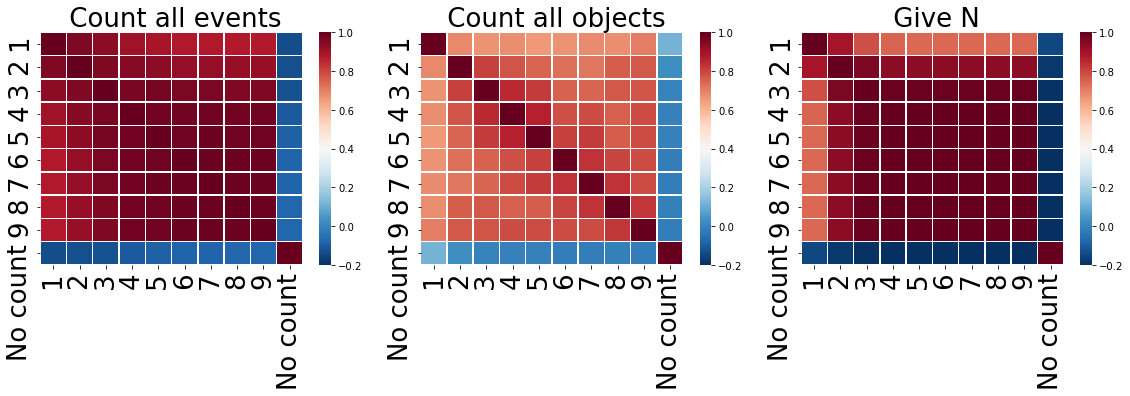

In [1129]:
within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
df_test = df_new_3
layer = 1
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

corr_matrix_entity = []
corr_matrix_entity_1 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[0] )
corr_matrix_entity.append(corr_matrix_entity_1)

within_class_instance = 'count_all_objects'
corr_matrix_entity_2 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[1] )
corr_matrix_entity.append(corr_matrix_entity_2)

within_class_instance = 'give_n'
corr_matrix_entity_3 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[2] )
corr_matrix_entity.append(corr_matrix_entity_3)
#plt.subplots_adjust(top=1.88)
fig.tight_layout()
#fig.suptitle('Correlations in the Visual Representation', fontsize=30)

plt.subplots_adjust(top=0.85) 

PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_vis_repr_diff_num_same_task_200.png'
fig.savefig(PATH, format='png')

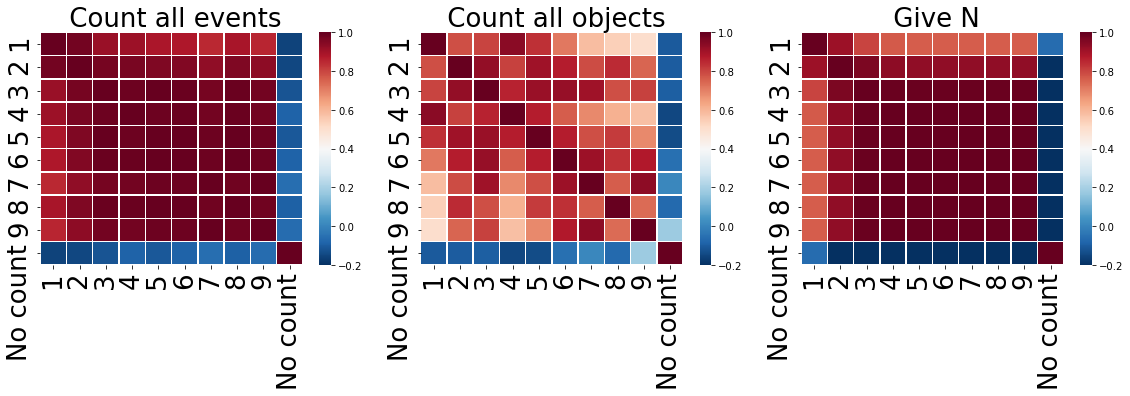

In [1020]:
within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
df_test = df_new_1
layer = 1
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

corr_matrix_entity = []
corr_matrix_entity_1 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[0] )
corr_matrix_entity.append(corr_matrix_entity_1)

within_class_instance = 'count_all_objects'
corr_matrix_entity_2 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[1] )
corr_matrix_entity.append(corr_matrix_entity_2)

within_class_instance = 'give_n'
corr_matrix_entity_3 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[2] )
corr_matrix_entity.append(corr_matrix_entity_3)
#plt.subplots_adjust(top=1.88)
fig.tight_layout()
#fig.suptitle('Correlations in the Visual Representation', fontsize=30)

plt.subplots_adjust(top=0.85) 

PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_vis_repr_diff_num_same_task_13.png'
fig.savefig(PATH, format='png')

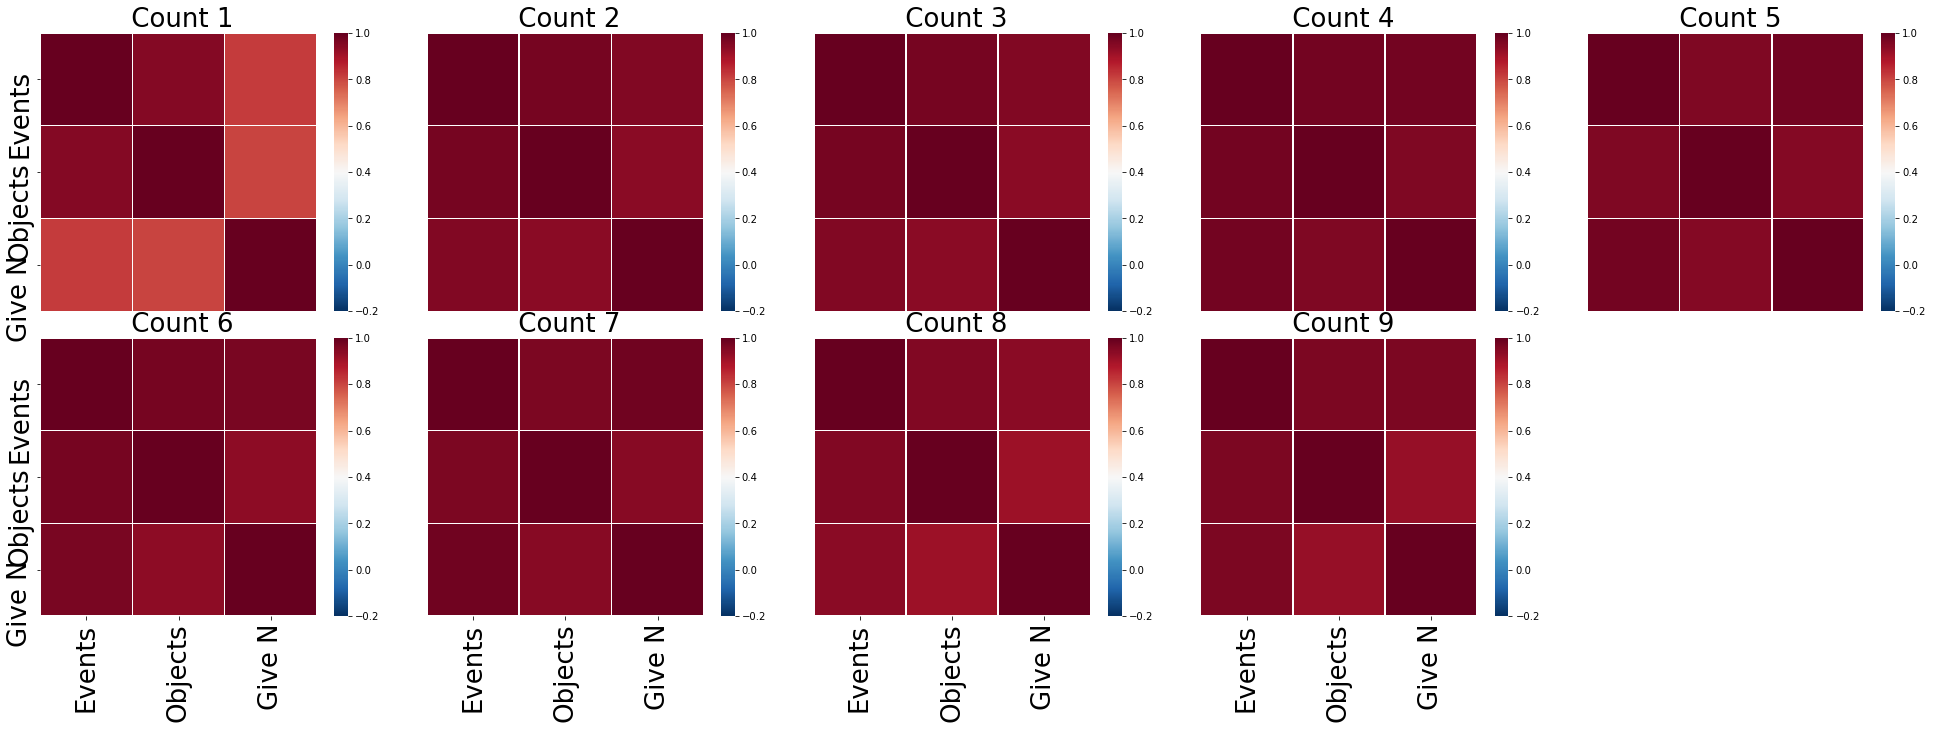

In [1135]:
within_class = 'asked_number'
within_class_instance = '3'
check_class = 'task'
df_test = df_new
layer = 0
df_test=df_new_3
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(27, 10))#
#fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(6, 3))
fig.tight_layout(pad=1.0) #
fig.subplots_adjust(left=None, bottom=0.05, right=None, top=0.86, wspace=None, hspace=None)
#fig.suptitle('Correlations in the Language Representation', fontsize=40)

corr_matrices_task_inv = []

for n in range(1,10):
    within_class_instance = str(n) 
    xaxis_labels=False
    yaxis_labels=False
    if((n-1)%5==0):
        yaxis_labels=True
    if((n-1)//5 == 1):
        xaxis_labels=True
    corr_matrix = get_correlation_matrix(df_test,within_class,
                                         within_class_instance,check_class, 
                                         layer=layer, plot=True,
                                         ax= ax[(n-1)//5,(n-1)%5],
                                         xaxis_labels=xaxis_labels,
                                         yaxis_labels=yaxis_labels)
    corr_matrices_task_inv.append(corr_matrix)

fig.delaxes(ax.flatten()[9])    
    
PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_lang_repr_same_num_diff_task_200.png'
fig.savefig(PATH, format='png')

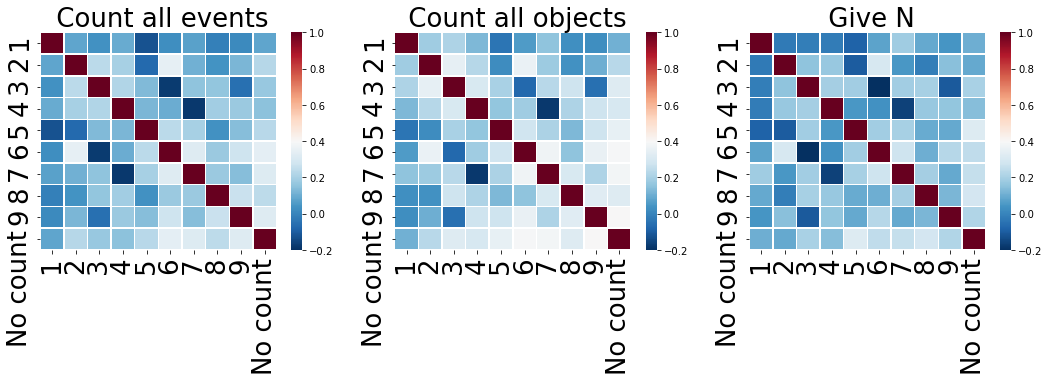

In [1134]:
within_class = 'task'
check_class = 'asked_number'
df_test=df_new_3
layer = 0
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

corr_matrix_diff_numb_repr = []

within_class_instance = 'count_all_events'
corr_matrix_diff_numb_repr_1 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[0] )
corr_matrix_diff_numb_repr.append(corr_matrix_diff_numb_repr_1[:-1,:-1])

within_class_instance = 'count_all_objects'
corr_matrix_diff_numb_repr_2 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[1] )
corr_matrix_diff_numb_repr.append(corr_matrix_diff_numb_repr_2[:-1,:-1])

within_class_instance = 'give_n'
corr_matrix_diff_numb_repr_3 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[2] )
corr_matrix_diff_numb_repr.append(corr_matrix_diff_numb_repr_3[:-1,:-1])


PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_lang_repr_diff_num_same_task_200.png'
fig.savefig(PATH, format='png')

In [1163]:
######### now collect all the correlation matrices
# corr_matrix_entity
# corr_matrices_task_inv
# corr_matrix_diff_numb_repr

### done. now make a function out of the boxplot stuff from matrix from above.

arr1=[]
for i in range(len(corr_matrix_entity)):
    corr_matrix_wo_last_col_and_row = corr_matrix_entity[i][:-1, :-1]
    arr1= np.concatenate((arr1, corr_matrix_wo_last_col_and_row[np.triu_indices(corr_matrix_wo_last_col_and_row.shape[0], k=1)]), axis=0)

    
arr2=[]
for i in range(len(corr_matrix_entity)):
    corr_matrix_only_last_col_and_row = corr_matrix_entity[i][-1, :-1]
    arr2= np.concatenate((arr2,corr_matrix_only_last_col_and_row), axis=0)   
    
arr3=[]
for i in range(len(corr_matrices_task_inv)):
    corr_matrix_lang_wo_last_col_and_row = corr_matrices_task_inv[i][:-1, :-1]
    arr3= np.concatenate((arr3,corr_matrix_lang_wo_last_col_and_row[np.triu_indices(corr_matrix_lang_wo_last_col_and_row[0].shape[0], k=1)]), axis=0)


arr4=[]
for i in range(len(corr_matrix_diff_numb_repr)):
    corr_matrix_only_last_col_and_row = corr_matrix_diff_numb_repr[i][-1, :-1]
    arr4=np.concatenate((arr4,corr_matrix_only_last_col_and_row  ), axis=0)  




#arr1 = corr_matrix_entity[0][np.triu_indices(corr_matrix_entity[0].shape[0], k=1)]
#arr2 = corr_matrix_lang_wo_last_col_and_row[np.triu_indices(corr_matrix_lang_wo_last_col_and_row[0].shape[0], k=1)]
#arr3 = corr_matrix_diff_numb_repr[0][-1][:-1] #corr_matrix_diff_numb_repr[0][np.triu_indices(corr_matrix_diff_numb_repr[0].shape[0], k=1)]
#arr4 = corr_matrix_entity[0][-1][:-1]


#fig, ax = plt.subplots(figsize=(12, 8))
#ax.boxplot([arr1,arr4, arr2,arr3])
#ax.set_xticklabels(['Vis-Repr \n Between numbers \n within same task','Vis-Repr \n Between count and no-count \n within same task', 'Lang-Repr \n Between tasks \n within same number', 'Lang-Repr \n Between numbers \n within same task'])

[Text(0, 0, 'Vis-Repr \n Between numbers \n within same task'),
 Text(0, 0, 'Vis-Repr \n Between count and no-count \n within same task'),
 Text(0, 0, 'Lang-Repr \n Between tasks \n within same number'),
 Text(0, 0, 'Lang-Repr \n Between numbers \n within same task')]

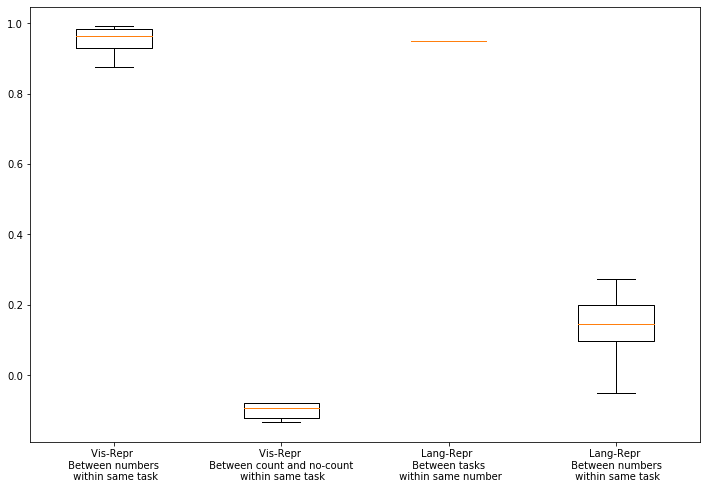

In [1159]:
######### now collect all the correlation matrices
# corr_matrix_entity
# corr_matrices_task_inv
# corr_matrix_diff_numb_repr

### done. now make a function out of the boxplot stuff from matrix from above.

corr_matrix_wo_last_col_and_row = corr_matrix_entity[0][:-1, :-1]
corr_matrix_only_last_col_and_row = corr_matrix_entity[0][-1, -1]

corr_matrix_lang_wo_last_col_and_row = corr_matrices_task_inv[0][:-1, :-1]
corr_matrix__lang_only_last_col_and_row = corr_matrix_entity[0][-1, -1]

arr1 = corr_matrix_wo_last_col_and_row[np.triu_indices(corr_matrix_wo_last_col_and_row.shape[0], k=1)]
#arr1 = corr_matrix_entity[0][np.triu_indices(corr_matrix_entity[0].shape[0], k=1)]
arr2 = corr_matrix_lang_wo_last_col_and_row[np.triu_indices(corr_matrix_lang_wo_last_col_and_row[0].shape[0], k=1)]
arr3 = corr_matrix_diff_numb_repr[0][-1][:-1] #corr_matrix_diff_numb_repr[0][np.triu_indices(corr_matrix_diff_numb_repr[0].shape[0], k=1)]
arr4 = corr_matrix_entity[0][-1][:-1]


fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot([arr1,arr4, arr2,arr3])
ax.set_xticklabels(['Vis-Repr \n Between numbers \n within same task','Vis-Repr \n Between count and no-count \n within same task', 'Lang-Repr \n Between tasks \n within same number', 'Lang-Repr \n Between numbers \n within same task'])

In [1165]:
arrs = [arr1,arr4, arr2,arr3]
arrs_mean = []
arrs_std = []
for i in arrs:
    arrs_mean.append(i.mean())
    arrs_std.append(i.std())
    print(i.mean())
    print("std: ", i.std())
    



0.8850462107957346
std:  0.1079825237639615
0.14295061157223596
std:  0.11973897639485033
-0.09288056419900294
std:  0.08544608628860298
0.9665617222027237
std:  0.009745733890266678


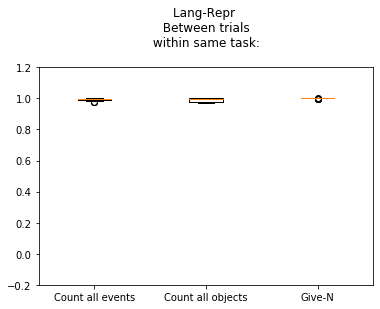

In [846]:
######### now collect all the correlation matrices
# SAME TASK; SAME NUMBER; LANG REPR;  DIFFERENT TRIALS

### 

fig, ax = plt.subplots()   #figsize=(18, 4)

arr1 = corr_matrix_same_numb_same_task[0][np.triu_indices(corr_matrix_same_numb_same_task[0].shape[0], k=1)]
#arr1 = corr_matrix_entity[0][np.triu_indices(corr_matrix_entity[0].shape[0], k=1)]
arr2 = corr_matrix_same_numb_same_task[1][np.triu_indices(corr_matrix_same_numb_same_task[1].shape[0], k=1)]
arr3 = corr_matrix_same_numb_same_task[2][np.triu_indices(corr_matrix_same_numb_same_task[2].shape[0], k=1)]


ax.boxplot([arr1,arr2,arr3] )

xtick_basis = 'Lang-Repr \n Between trials \n within same task: \n'
xtick1 = 'Count all events'  #xtick_basis + 
xtick2 = 'Count all objects'  #xtick_basis + 
xtick3 = 'Give-N'   #xtick_basis + 

ax_title = xtick_basis
ax.set_title(ax_title)
ax.set_xticklabels([xtick1, xtick2, xtick3])
#ax.set_xticks([1, 2,3], [xtick1, xtick2, xtick3])
ax.set_ylim((-0.2,1.2))

PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_lang_repr_same_num_same_task_diff_trials.eps'
fig.savefig(PATH, format='eps')

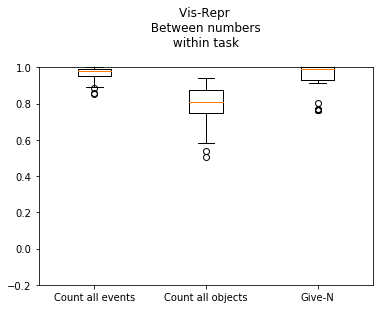

In [847]:
#### keyyyy
def get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrix_entity):
    whole_arr =[]
    for i in range(0,len(corr_matrix_entity)):
        arr = corr_matrix_entity[i][np.triu_indices(corr_matrix_entity[i].shape[0], k=1)]
        whole_arr.append(arr)
        
    return whole_arr

fig, ax = plt.subplots()

seperate_arr = get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrix_entity_reduced)
# prepare tick labels
tick_labels = []
for i in range(len(seperate_arr)):
    label = readable_task[task_list[i]]
    label = 'Vis-Repr \n Between numbers \n within task \n' + label
    tick_labels.append(label)

ax.boxplot(seperate_arr )

xtick_basis = 'Vis-Repr \n Between numbers \n within task \n'
xtick1 = 'Count all events'  #xtick_basis + 
xtick2 = 'Count all objects'  #xtick_basis + 
xtick3 = 'Give-N'   #xtick_basis + 

ax_title = xtick_basis
ax.set_title(ax_title)
ax.set_xticklabels([xtick1, xtick2, xtick3])

ax.set_ylim((-0.2,1))

PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_vis_repr_diff_num_same_task_wo_no_count.eps'
fig.savefig(PATH, format='eps')


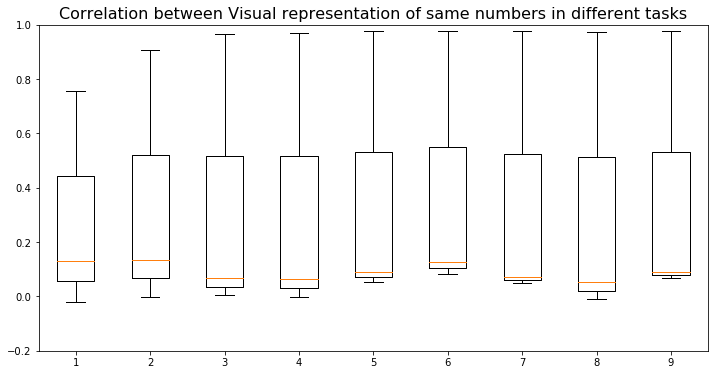

In [870]:


seperate_arr = get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrices)
# prepare tick labels
tick_labels = []
for i in range(len(seperate_arr)):
    label = df_new_1.asked_number.unique()[i]
    label = 'Vis-Repr \n' + label
    tick_labels.append(label)
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(seperate_arr )
ax.set_xticks(range(1,len(tick_labels)+1), tick_labels)
ax.set_ylim((-0.2,1))
ax.set_title('Correlation between Visual representation of same numbers in different tasks', fontsize=16)

PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_vis_repr_same_num_diff_task_wo_no_count.png'
fig.savefig(PATH, format='png')

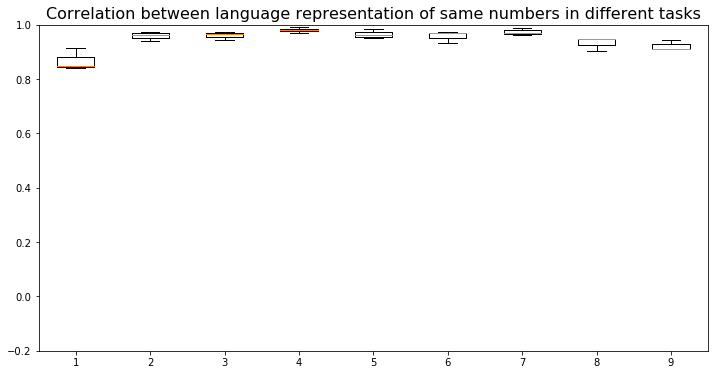

In [851]:
seperate_arr = get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrices_task_inv)
# prepare tick labels
tick_labels = []
for i in range(len(seperate_arr)):
    label = df_new_1.asked_number.unique()[i]
    label = 'Lang-Repr \n' + label
    tick_labels.append(label)
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(seperate_arr )
ax.set_xticks(range(1,len(tick_labels)+1), tick_labels)
ax.set_ylim((-0.2,1))
ax.set_title('Correlation between language representation of same numbers in different tasks', fontsize=16)

PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_vis_repr_same_num_diff_task_wo_no_count.eps'
fig.savefig(PATH, format='eps')

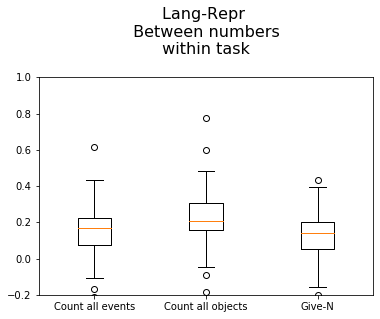

In [854]:

fig, ax = plt.subplots()

seperate_arr = get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrix_diff_numb_repr)
# prepare tick labels
tick_labels = []
for i in range(len(seperate_arr)):
    label = readable_task[task_list[i]]
    label = 'Lang-Repr \n Between numbers \n within task \n' + label
    tick_labels.append(label)
#fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(seperate_arr )


xtick_basis = 'Lang-Repr \n Between numbers \n within task \n'
xtick1 = 'Count all events'  #xtick_basis + 
xtick2 = 'Count all objects'  #xtick_basis + 
xtick3 = 'Give-N'   #xtick_basis + 
tick_labels = [xtick1, xtick2, xtick3]

ax_title = xtick_basis
ax.set_title(ax_title, fontsize=16)
ax.set_xticklabels(tick_labels)
ax.set_ylim((-0.2,1))


PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_lang_repr_diff_num_same_task.eps'
fig.savefig(PATH, format='eps')